# URLA WIND TURBINE WIND POWER PREDICTION

# Preprocessing-Feature Engineering-EDA(Exploratory Data Analysis)


In order to predict the Urla wind turbines' wind power, the coordinates were chosen from ERA5 as follows North 38.32, South 38.31, East 26.61, and West 26.59, and its air levels were equivalent to a height of 100 meters.

A 12 month data were collected from ERA5 that contains date, time, latitude, longitude, temperature (in Kelvin), and the U- and V-components (north-south) of wind. Wind speed and wind direction were calculated from the U-component and V-component wind values from the ERA5 data set.

Active power values of wind turbines were taken from EPIAS Transparency Platform.

In [4]:
# Import Necessary Library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from os import mkdir
# set figure size of graphics
sns.set(rc={'figure.figsize':(6,4)})

In [5]:
# Create a new directory named "Plots"
try:
    mkdir('Plots')
except:
    pass
mypaths='Plots'

In [6]:
#Load the dataset
df_urla= pd.read_csv("df_urla.csv")
df_urla.drop(columns=["Unnamed: 0"],inplace=True)
df_urla

time  wind_speed  wind_direction  wind_power  \
0     2022-12-01 00:00:00   16.748672       303.48303      1210.0   
1     2022-12-01 01:00:00   17.214901       302.02982      1030.0   
2     2022-12-01 02:00:00   16.783213       296.19452      2590.0   
3     2022-12-01 03:00:00   16.343103       294.95004      2790.0   
4     2022-12-01 04:00:00   15.911706       292.40262      4670.0   
...                   ...         ...             ...         ...   
8755  2023-11-30 19:00:00    5.900000       220.00000      2510.0   
8756  2023-11-30 20:00:00    7.100000       175.00000      4750.0   
8757  2023-11-30 21:00:00    6.700000       186.00000      6380.0   
8758  2023-11-30 22:00:00    7.300000       172.00000      6600.0   
8759  2023-11-30 23:00:00    9.500000       161.00000      6660.0   

      temperature  relative_humidity  air_pressure  
0       13.461456          71.689850         99.87  
1       13.210205          75.427390         99.87  
2       12.583069          85.076225         99.86  
3       12.297150          90.470960         99.85  
4       12.042053          93.421660         99.83  
...           ...                ...           ...  
8755    16.300000                NaN           NaN  
8756    15.000000                NaN           NaN  
8757    14.900000                NaN           NaN  
8758    14.900000                NaN           NaN  
8759    15.400000                NaN           NaN  

[8760 rows x 7 columns]

In [7]:
# Convert 'time' column to datetime format
df_urla["time"]= pd.to_datetime(df_urla["time"])

In [8]:
# Display a concise summary of the structure of a DataFrame 
df_urla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               8760 non-null   datetime64[ns]
 1   wind_speed         8760 non-null   float64       
 2   wind_direction     8760 non-null   float64       
 3   wind_power         8760 non-null   float64       
 4   temperature        8760 non-null   float64       
 5   relative_humidity  8688 non-null   float64       
 6   air_pressure       8688 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 479.2 KB


In [9]:
# Generate the statistical summary of the DataFrame
df_urla.describe().T

count         mean          std        min         25%  \
wind_speed         8760.0     8.697069     5.161442   0.083034    4.782050   
wind_direction     8760.0   133.807578    89.241758   0.000000   66.373093   
wind_power         8760.0  4834.918950  4588.278888   0.000000  780.000000   
temperature        8760.0    16.258731     7.187660  -3.523315   10.603363   
relative_humidity  8688.0    60.788528    18.163287  10.584358   46.833282   
air_pressure       8688.0    99.897442     0.566317  97.140000   99.500000   

                           50%          75%           max  
wind_speed            7.941149    11.690764     38.400000  
wind_direction       92.267775   217.452798    359.702600  
wind_power         3310.000000  8280.000000  15360.000000  
temperature          16.104950    22.070312     37.541412  
relative_humidity    61.154398    75.096592    101.620926  
air_pressure         99.850000   100.190000    101.710000

The dataset includes the wind power for every hour of interval for last 1 year. It consists of 8760 observations. It includes features such as wind speed, wind direction, temperature, relative humidity and air pressure. We see the descriptive statistics of the dataset. For example, we see min wind speed as 0.083034, max one as 38.4 which is at cut out speed. Wind power ranges between 0 and 15360 (only one row). We can infer 0(zero) wind power could be because of the cut in or cut out speed values or failure.

<AxesSubplot: title={'center': 'Correlation Matrix'}>

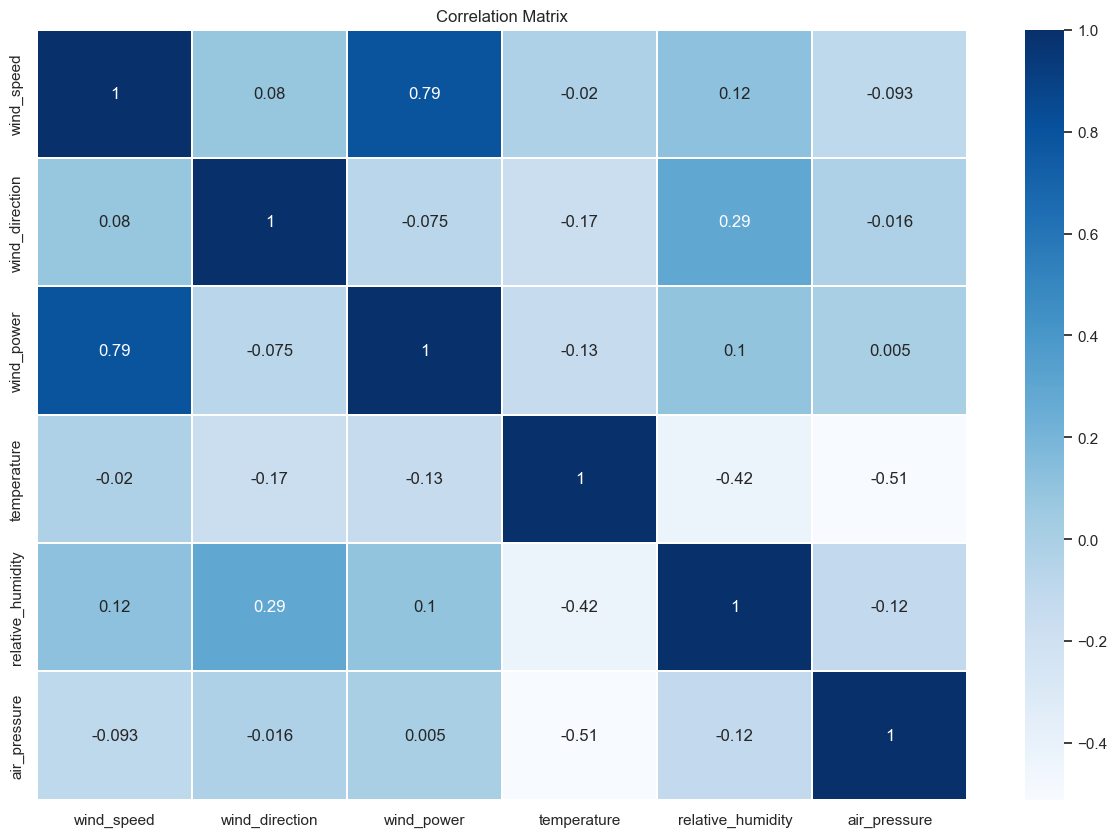

In [11]:
# Display the heatmap to get the relationships between data features 
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df_urla.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')

We see that the wind speed and wind power production is highly correlated (0.79) as expected in Correlation Matrix.

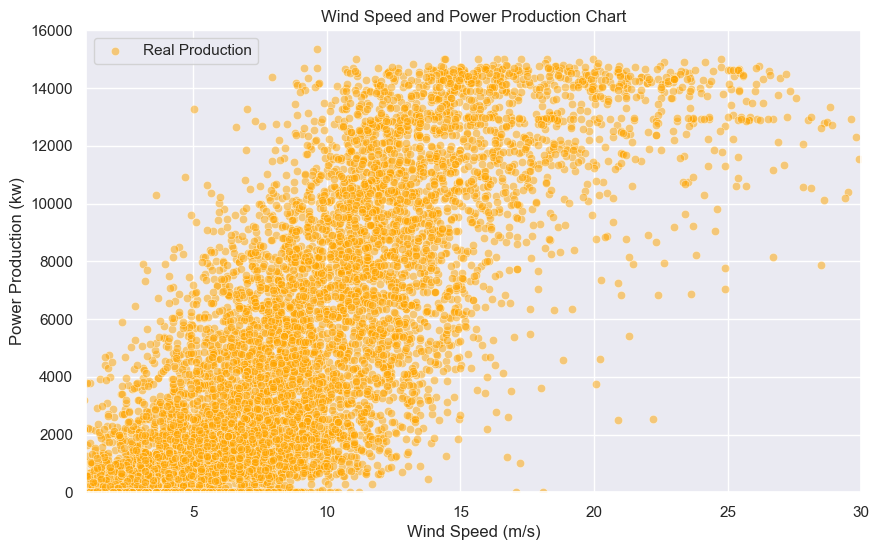

In [13]:
# Plot the Wind Speed and Power Production Chart
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed', y='wind_power', color='orange', label='Real Production', alpha=0.5, data=df_urla)
plt.ylim(0,16000)
plt.xlim(1,30)
plt.title('Wind Speed and Power Production Chart')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Production (kw)');
plt.savefig('Plots/Wind Speed and Power Production Chart.png')

##  Feature Engineering(Air Density, Theoretical Power)

A wind turbine power curve demonstrates the performance of wind turbine, the relationship between wind speed and wind power, enables power forecasting. The power curve of a wind turbine displays the electrical power output ratings at various wind speeds. The main characteristic speeds are: cut-in (Vc), rated (Vr) and cut-out (Vs) speeds. The turbine begins to generate power at the cut-in speed. The generator produces the rated power at its rated speed. In order to prevent malfunctions and damages, the power generation is stopped when the wind speed reaches the cut-out speed. Theoretical power curves assume ideal conditions.

However, real-world factors like location, air density, wind distribution, and mechanical issues can make theoretical power curves significantly different. In order to display the theoretical power curve, we calculated air density and theoretical power. 

Theoretical power calculation as follows:

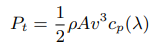

Pt is theorical wind power,

ρ is the density of air, which depends on the pressure and moisture levels of air

A is the circular swept area of the turbine πR2 (For this project, the Urla wind turbines’ model is Enercon E-82 E4, and its swept area = 528281 m²)

v is the wind speed

cp (λ) is called the power coefficient (0.4)

In [18]:
# Function to calculate the air density
def calculate_air_density(temperature, air_pressure, relative_humidity):
    # Constants
    gas_constant = 287.05  # J/(kg*K)
    # Calculate vapor pressure
    saturation_pressure = 6.11 * 10 ** ((7.5 * temperature) / (temperature + 237.3))
    vapor_pressure = saturation_pressure * relative_humidity / 100
    # Calculate air density
    air_density = (air_pressure - (0.378 * vapor_pressure)) / (gas_constant * (temperature + 273.15))

    return air_density

In [19]:
# Add a new column called "air_density" by using calculate_air_density function
df_urla["air_density"] = calculate_air_density(df_urla['temperature'], df_urla['air_pressure'], df_urla['relative_humidity'])

In [20]:
df_urla

time  wind_speed  wind_direction  wind_power  temperature  \
0    2022-12-01 00:00:00   16.748672       303.48303      1210.0    13.461456   
1    2022-12-01 01:00:00   17.214901       302.02982      1030.0    13.210205   
2    2022-12-01 02:00:00   16.783213       296.19452      2590.0    12.583069   
3    2022-12-01 03:00:00   16.343103       294.95004      2790.0    12.297150   
4    2022-12-01 04:00:00   15.911706       292.40262      4670.0    12.042053   
...                  ...         ...             ...         ...          ...   
8755 2023-11-30 19:00:00    5.900000       220.00000      2510.0    16.300000   
8756 2023-11-30 20:00:00    7.100000       175.00000      4750.0    15.000000   
8757 2023-11-30 21:00:00    6.700000       186.00000      6380.0    14.900000   
8758 2023-11-30 22:00:00    7.300000       172.00000      6600.0    14.900000   
8759 2023-11-30 23:00:00    9.500000       161.00000      6660.0    15.400000   

      relative_humidity  air_pressure  air_density  
0             71.689850         99.87     0.001163  
1             75.427390         99.87     0.001162  
2             85.076225         99.86     0.001160  
3             90.470960         99.85     0.001159  
4             93.421660         99.83     0.001159  
...                 ...           ...          ...  
8755                NaN           NaN          NaN  
8756                NaN           NaN          NaN  
8757                NaN           NaN          NaN  
8758                NaN           NaN          NaN  
8759                NaN           NaN          NaN  

[8760 rows x 8 columns]

Urla wind turbine (Enercon E-82 E4 model) features: swept_area = 5281 m², Cut-in wind speed:2.0 m/s, Cut-out wind speed:34.0 m/s, Rated power:2,350.0 kW, max Rated power:3000.0 kW.

Since there are 5 turbines, 2350*5= 11750, but since the rated max power  is 3000, the maximum power is 3000 x 5= 15000.

In [22]:
# Function to calculate the theoretical power
def calculate_theoretical_power(air_density: float, wind_speed: float) -> tuple:
    power_coefficient = 0.4
    swept_area = 5281
    theoretical_power = 0.5 * air_density * swept_area * wind_speed**3 * power_coefficient * 5
   
    return theoretical_power

In [23]:
# Apply Formula 
p = calculate_theoretical_power(df_urla['air_density'], df_urla['wind_speed'])

# Convert into dataframe
df_p = pd.DataFrame({'theoretical_power': p})
df_p

theoretical_power
0          28857.179919
1          31314.209961
2          28968.868027
3          26715.581586
4          24652.614500
...                 ...
8755                NaN
8756                NaN
8757                NaN
8758                NaN
8759                NaN

[8760 rows x 1 columns]

In [24]:
# Filter the rows where the value in the "theoretical_power" column is greater than 15000.
df_p[df_p["theoretical_power"]>15000]

theoretical_power
0          28857.179919
1          31314.209961
2          28968.868027
3          26715.581586
4          24652.614500
...                 ...
8654      155471.423944
8655       86575.441327
8656       38114.435158
8657       27006.843643
8658       25208.567928

[1350 rows x 1 columns]

In [25]:
# Because of the wind turbine model's rated max power, set the values in the "theoretical_power" column to 15000 for the rows where the original value is greater than 15000.
df_p[df_p["theoretical_power"]>=15000]= 15000

In [26]:
# Concat the dataframes
df_urla_last = pd.concat([df_urla, df_p] , axis=1)

In [27]:
# Display the dataframe
df_urla_last

time  wind_speed  wind_direction  wind_power  temperature  \
0    2022-12-01 00:00:00   16.748672       303.48303      1210.0    13.461456   
1    2022-12-01 01:00:00   17.214901       302.02982      1030.0    13.210205   
2    2022-12-01 02:00:00   16.783213       296.19452      2590.0    12.583069   
3    2022-12-01 03:00:00   16.343103       294.95004      2790.0    12.297150   
4    2022-12-01 04:00:00   15.911706       292.40262      4670.0    12.042053   
...                  ...         ...             ...         ...          ...   
8755 2023-11-30 19:00:00    5.900000       220.00000      2510.0    16.300000   
8756 2023-11-30 20:00:00    7.100000       175.00000      4750.0    15.000000   
8757 2023-11-30 21:00:00    6.700000       186.00000      6380.0    14.900000   
8758 2023-11-30 22:00:00    7.300000       172.00000      6600.0    14.900000   
8759 2023-11-30 23:00:00    9.500000       161.00000      6660.0    15.400000   

      relative_humidity  air_pressure  air_density  theoretical_power  
0             71.689850         99.87     0.001163            15000.0  
1             75.427390         99.87     0.001162            15000.0  
2             85.076225         99.86     0.001160            15000.0  
3             90.470960         99.85     0.001159            15000.0  
4             93.421660         99.83     0.001159            15000.0  
...                 ...           ...          ...                ...  
8755                NaN           NaN          NaN                NaN  
8756                NaN           NaN          NaN                NaN  
8757                NaN           NaN          NaN                NaN  
8758                NaN           NaN          NaN                NaN  
8759                NaN           NaN          NaN                NaN  

[8760 rows x 9 columns]

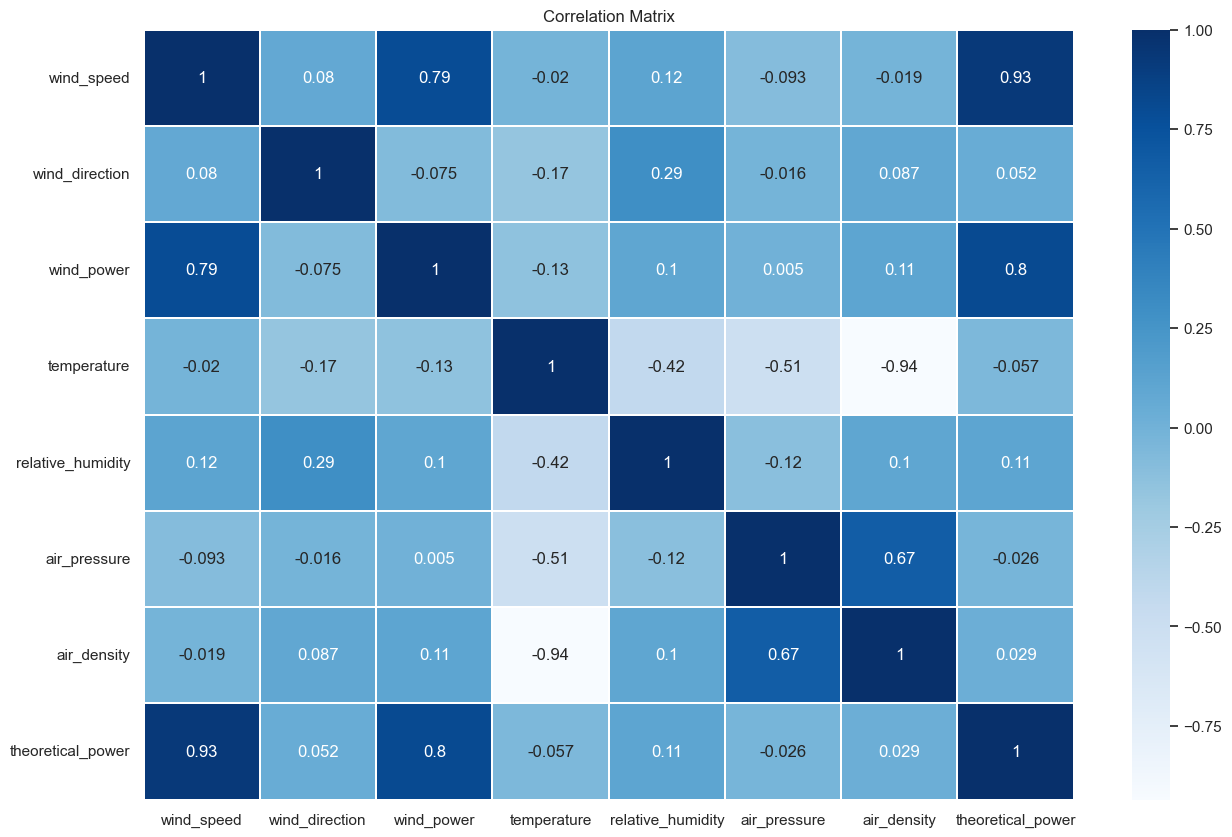

In [28]:
# Display the heatmap to get the relationships between data features 
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df_urla_last.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')
plt.savefig('Plots/Correlation Matrix.png')

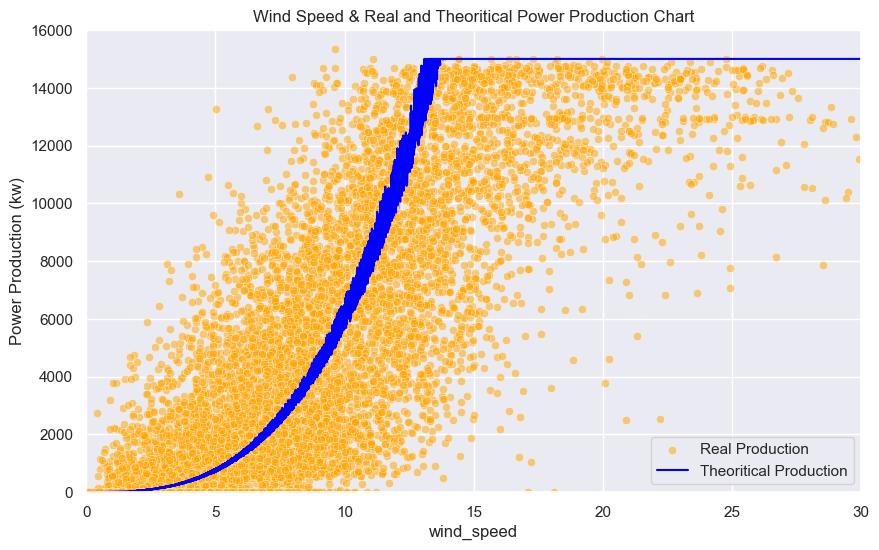

In [29]:
# Plot the Wind Speed & Real and Theoritical Power Production Chart
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_speed', y='wind_power', color='orange', label='Real Production', alpha=0.5, data=df_urla_last)
plt.ylim(0,16000)
plt.xlim(0,30)
sns.lineplot(x='wind_speed', y='theoretical_power', color='blue', label='Theoritical Production', data=df_urla_last)
plt.title('Wind Speed & Real and Theoritical Power Production Chart')
plt.ylabel('Power Production (kw)');
plt.savefig('Plots/Wind Speed & Real and Theoritical Power Production Chart.png')

The scatter plot shows how the wind power varies with different wind speeds. We also see zero wind power although the wind speed is at rated speed, and we can infer that something wrong happened such as failure or damages. We also see the theoritical power curve which is constant at 15000 due to the turbine model property. We can also infer the theoritical power curve generally fits well with the real production.


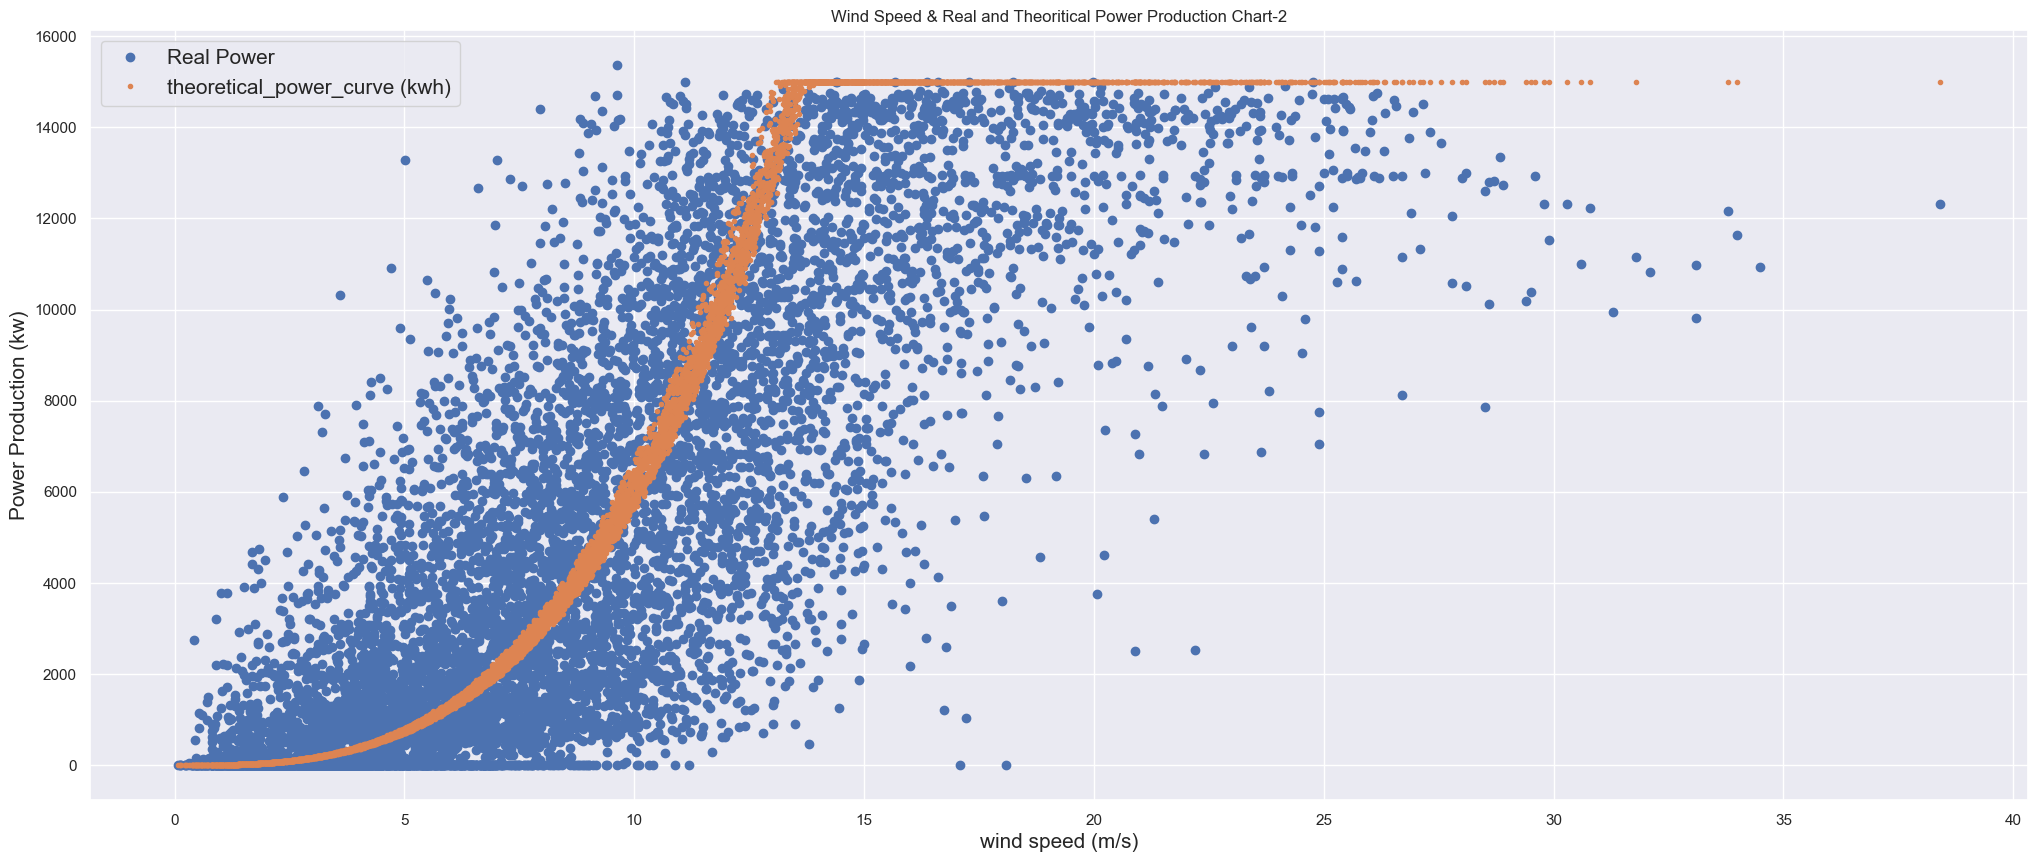

In [31]:
# Plot Wind Speed & Real and Theoritical Power Production
data = df_urla_last
exp = data['wind_power']
the = data['theoretical_power']
plt.figure(figsize=(25,10)) 
plt.plot(data['wind_speed'], data['wind_power'], 'o', label='Real Power')
plt.plot(data['wind_speed'], data['theoretical_power'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Speed & Real and Theoritical Power Production Chart-2')
plt.legend(fontsize=15)
plt.savefig('Plots/Wind Speed & Real and Theoritical Power Production Chart-2.png')
plt.show()

In [32]:
# Save the urla_alll DataFrame as a CSV file
df_urla_last.to_csv('urla_alll.csv', index=True)

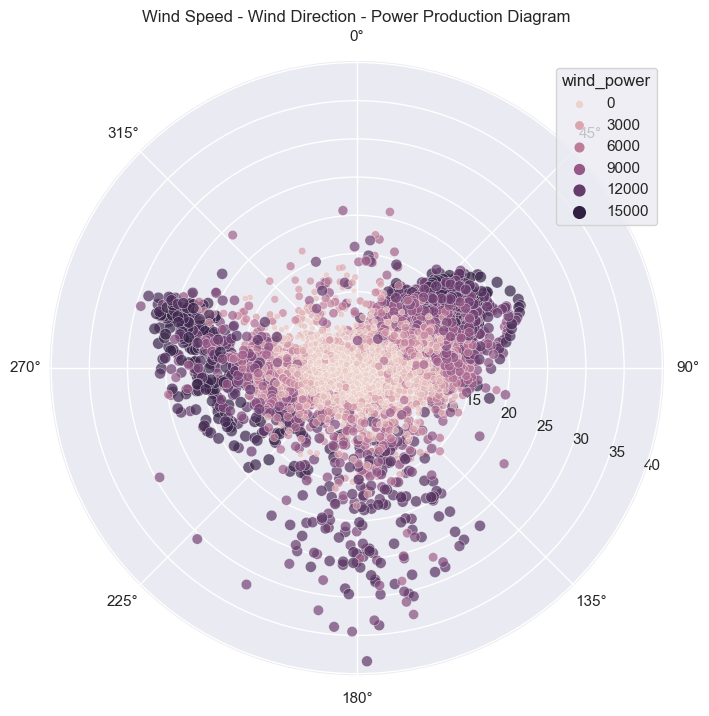

In [33]:
# Creating the polar diagram
from math import radians

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in df_urla_last['wind_direction']], 
                y=df_urla_last['wind_speed'],
                size=df_urla_last['wind_power'],
                hue=df_urla_last['wind_power'],
                alpha=0.7)
# Setting the polar diagram's top represents the North 
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram')
plt.ylabel(None);
plt.savefig('Plots/Wind Speed - Wind Direction - Power Production Diagram.png')

It can be inferred that the wind turbine produces more power as the directions are between 40-100 and 225-300 degrees from the polar diagram. Between 135 and 200 it has also some density. The highest wind speed are gathered esspecially 250-300 degrees and some highest wind speed are scattered around 145-200 degrees. Contrary to the windrose plot, between the southwest and northwest have the highest wind speed, so that indicates good site for wind turbine to produce more wind power. When the wind speed increases, the wind power also increases as expected.

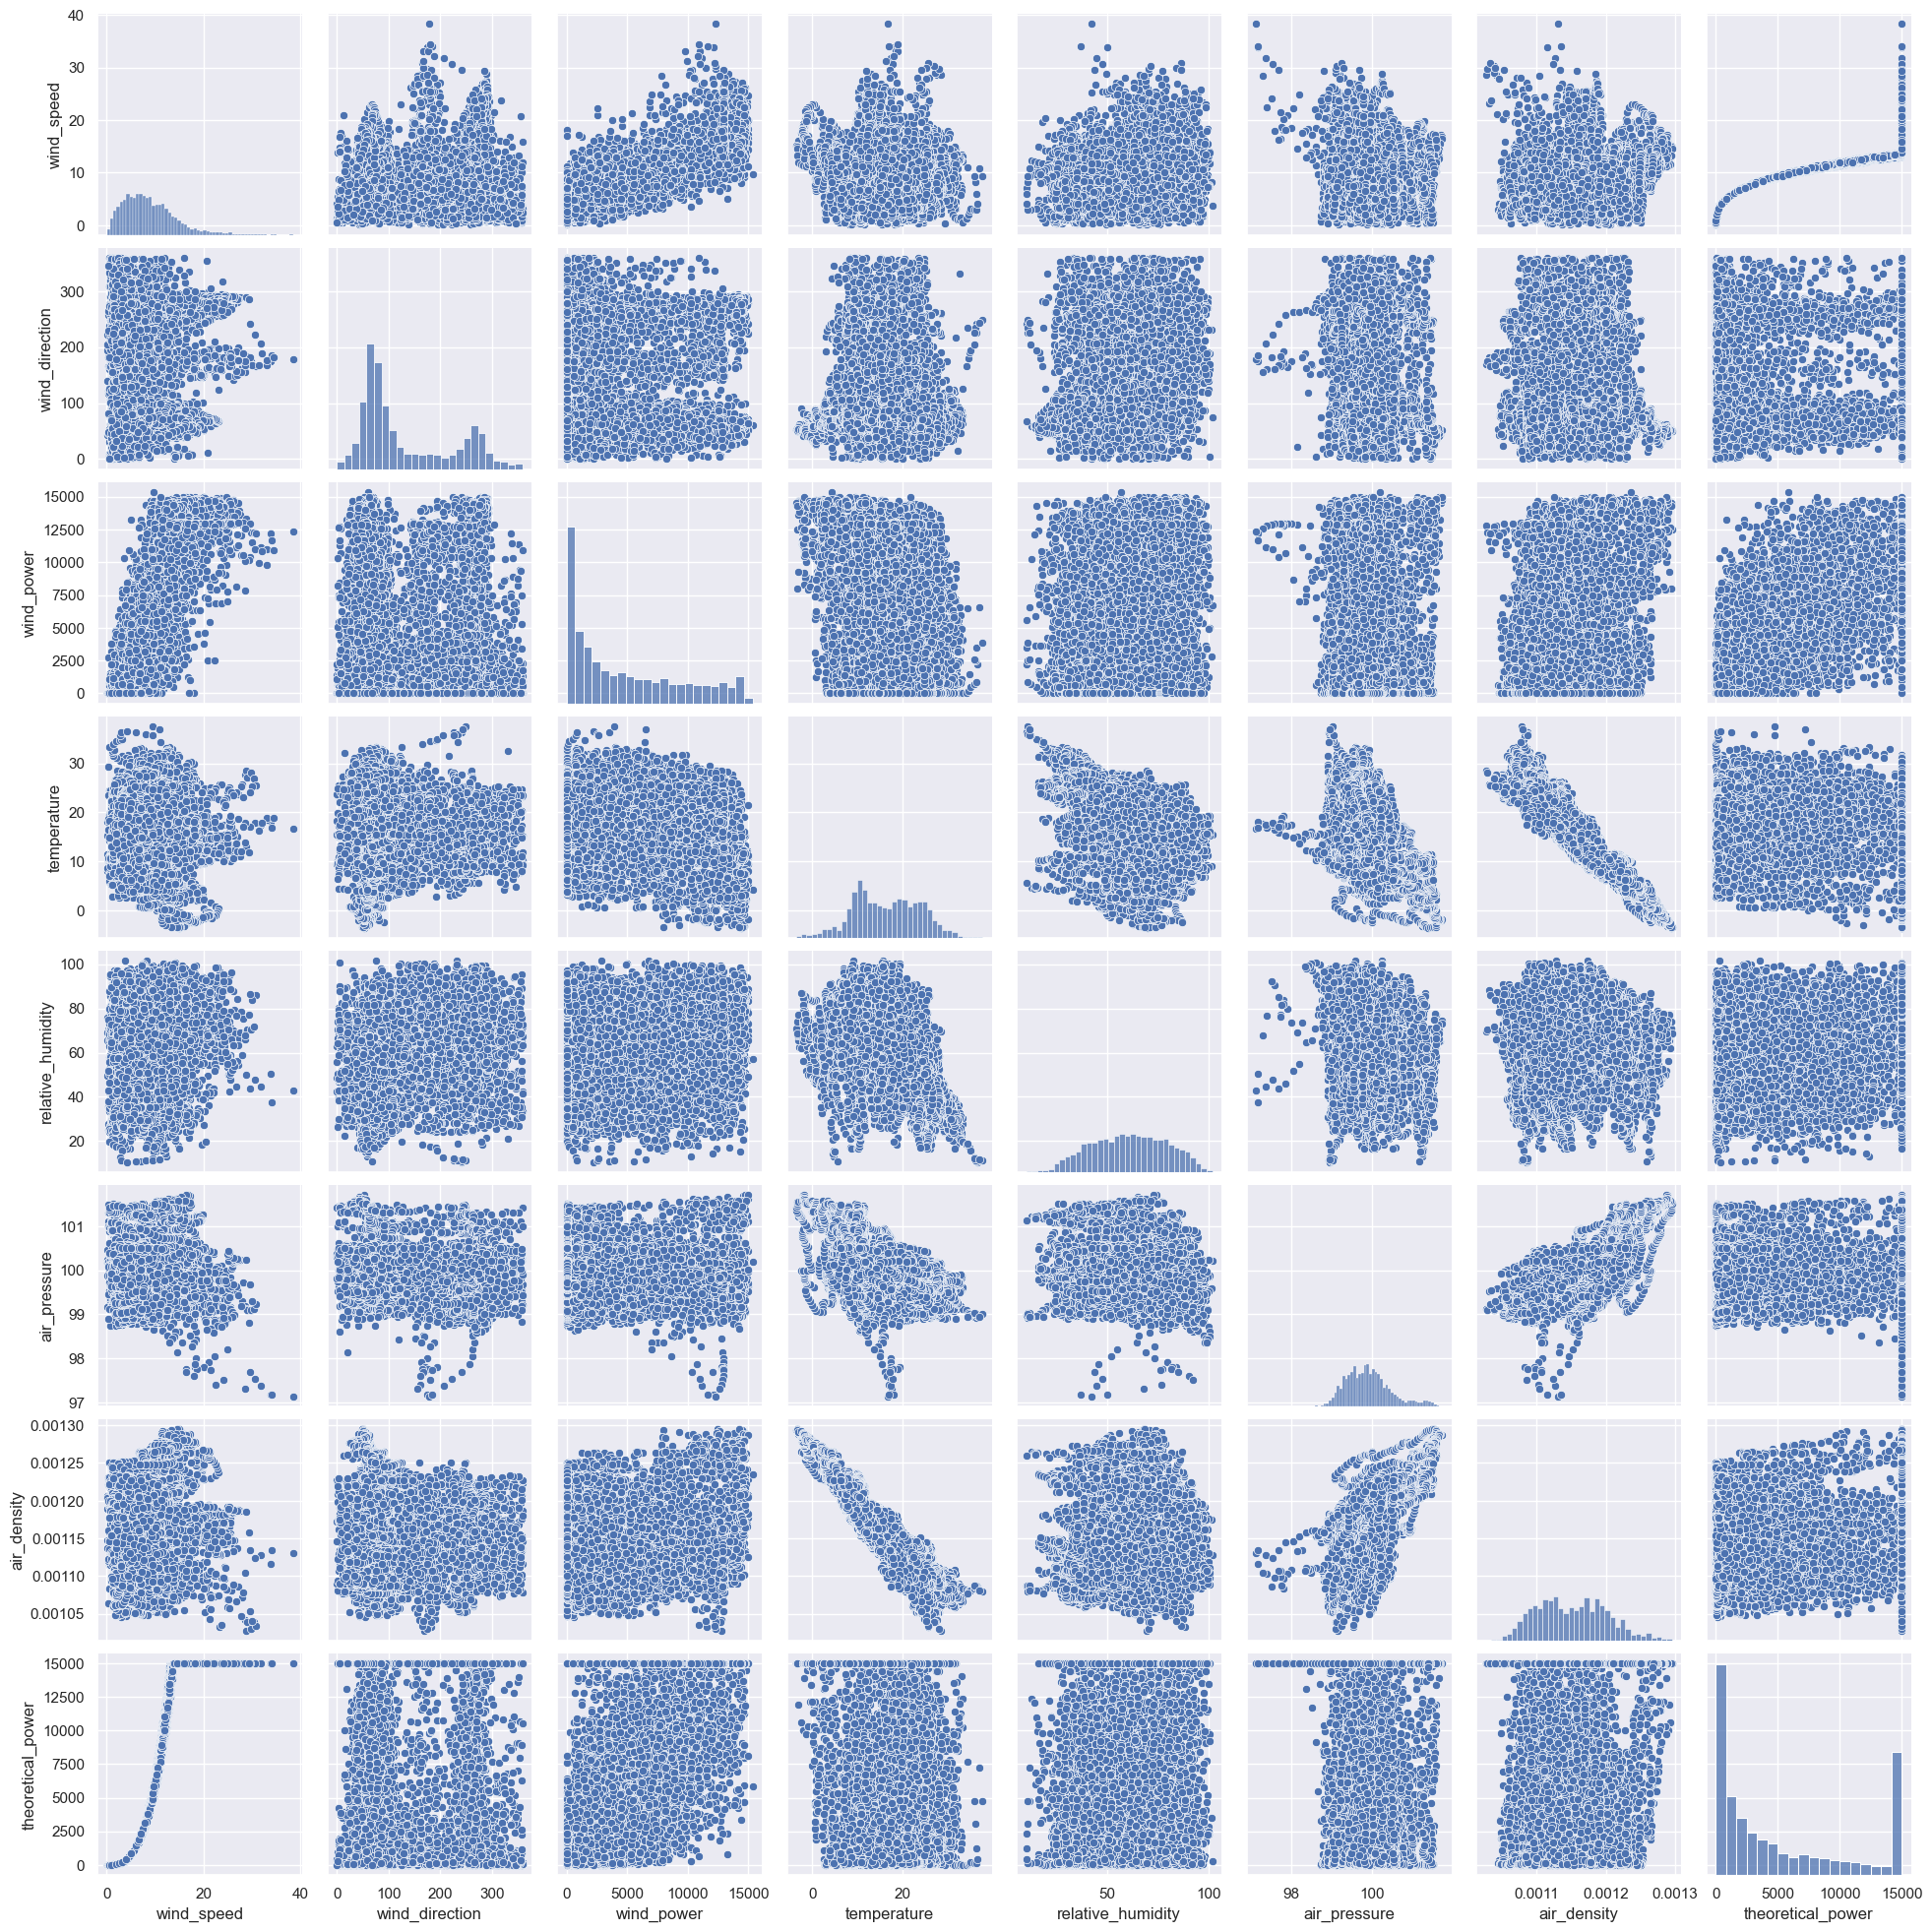

In [35]:
# Pair Plot correlation between all attributes
sns.pairplot(df_urla_last)
plt.savefig('Plots/Pair Plot Correlation Between All Attributes.png')

In [36]:
# Importing a visualization library
! pip install windrose

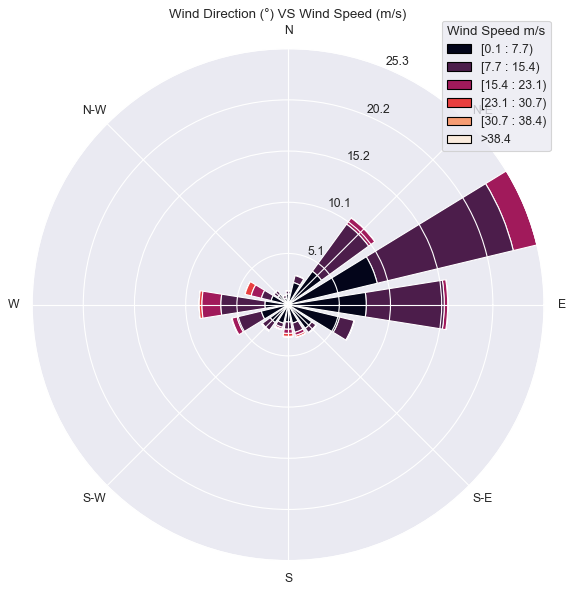

In [37]:
from windrose import WindroseAxes

# Create a wind rose plot using the WindroseAxes 
ax = WindroseAxes.from_ax()
ax.bar(df_urla_last['wind_direction'], df_urla_last['wind_speed'], normed=True, opening=0.8, edgecolor='white')
plt.legend(loc=(0.8,0.8), title='Wind Speed m/s')
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.savefig('Plots/Wind Direction VS Wind Speed.png')
plt.show()

The wind rose plot shows that the wind direction is mostly between the northeast and east while some wind also comes from the west 

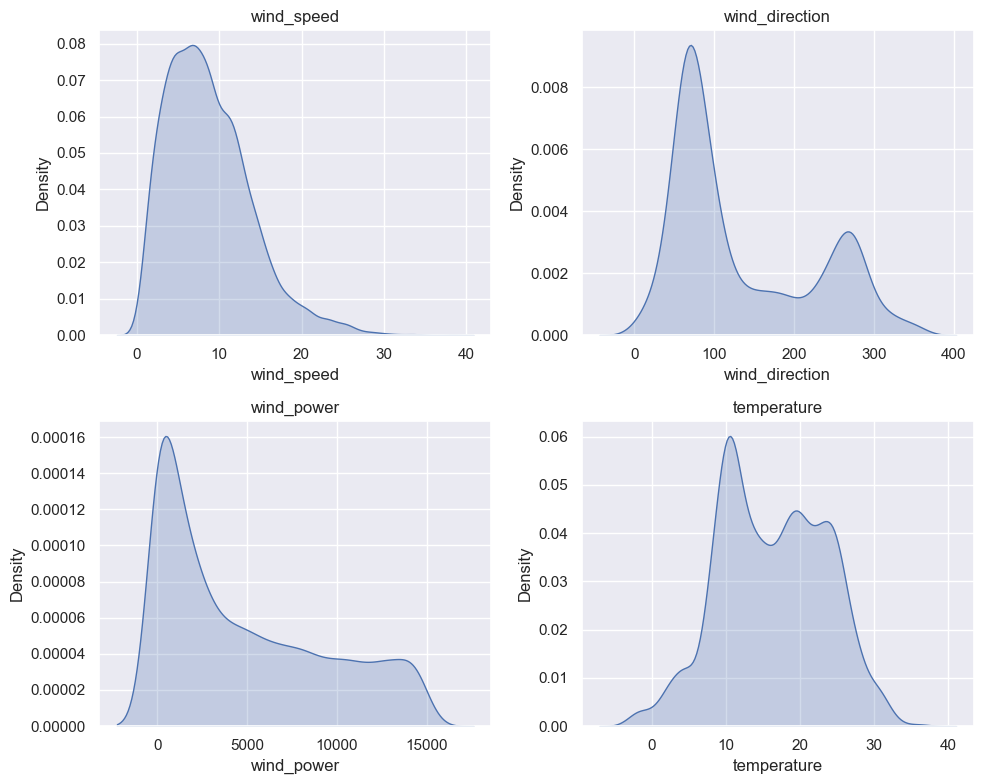

In [39]:
# Plot the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df_urla_last.iloc[:,i+1], shade=True)
    plt.title(df_urla_last.columns[i+1])
plt.tight_layout()
plt.savefig('Plots/KDE Plots.png')
plt.show()

The data distributions in KDE plots: 

It can be inferred most of the wind speed values are between 3 and 15. 

Most of the temperature values are between 8 and 28. 

Most of the wind direction values are between 25-115 degrees as seen in the polar diagram.

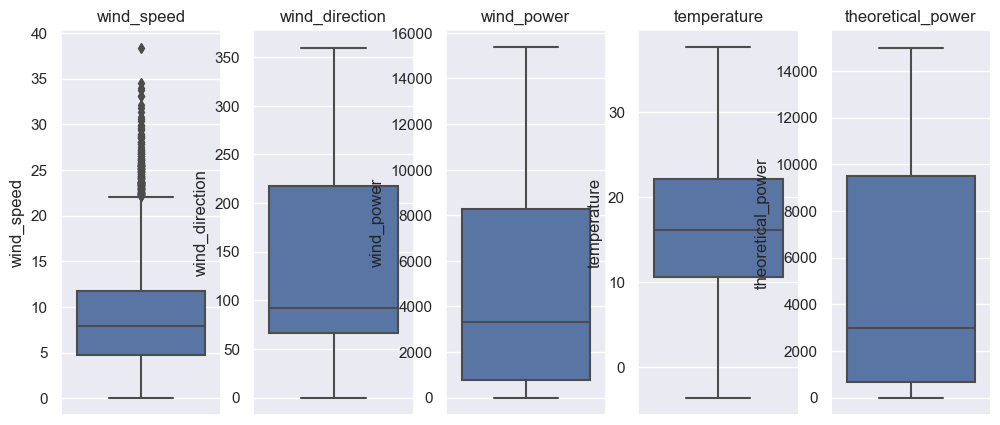

In [41]:
# Generates box plots for columns
columns = ['wind_speed', 'wind_direction', 'wind_power', 'temperature', 'theoretical_power']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,5,i)
    sns.boxplot(data = df_urla_last, y= each)
    plt.title(each)
    i += 1
plt.savefig('Plots/BoxPlots.png')

In [42]:
# Select columns for models
df_urla_annual=df_urla_last [["time", "wind_speed", "wind_direction", "temperature", "wind_power","theoretical_power"]]

In [43]:
# Save the DataFrame as a CSV file
df_urla_annual.to_csv('urla_annual.csv', index=True)

# TRAINING MODELS (URLA WIND POWER PREDICTION)

In [45]:
# Import Necessary Library
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from os import mkdir
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor
# set figure size of graphics
sns.set(rc={'figure.figsize':(6,4)})

In [46]:
# Create a new directory named "Model_Plots"
try:
    mkdir('Model_Plots')
except:
    pass
mypaths='Model_Plots'

In [47]:
# Load the dataset
df = pd.read_csv('urla_annual.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
df

time  wind_speed  wind_direction  temperature  \
0     2022-12-01 00:00:00   16.748672       303.48303    13.461456   
1     2022-12-01 01:00:00   17.214901       302.02982    13.210205   
2     2022-12-01 02:00:00   16.783213       296.19452    12.583069   
3     2022-12-01 03:00:00   16.343103       294.95004    12.297150   
4     2022-12-01 04:00:00   15.911706       292.40262    12.042053   
...                   ...         ...             ...          ...   
8755  2023-11-30 19:00:00    5.900000       220.00000    16.300000   
8756  2023-11-30 20:00:00    7.100000       175.00000    15.000000   
8757  2023-11-30 21:00:00    6.700000       186.00000    14.900000   
8758  2023-11-30 22:00:00    7.300000       172.00000    14.900000   
8759  2023-11-30 23:00:00    9.500000       161.00000    15.400000   

      wind_power  theoretical_power  
0         1210.0            15000.0  
1         1030.0            15000.0  
2         2590.0            15000.0  
3         2790.0            15000.0  
4         4670.0            15000.0  
...          ...                ...  
8755      2510.0                NaN  
8756      4750.0                NaN  
8757      6380.0                NaN  
8758      6600.0                NaN  
8759      6660.0                NaN  

[8760 rows x 6 columns]

# Real Power and Theoretical Power(kwh) Curve

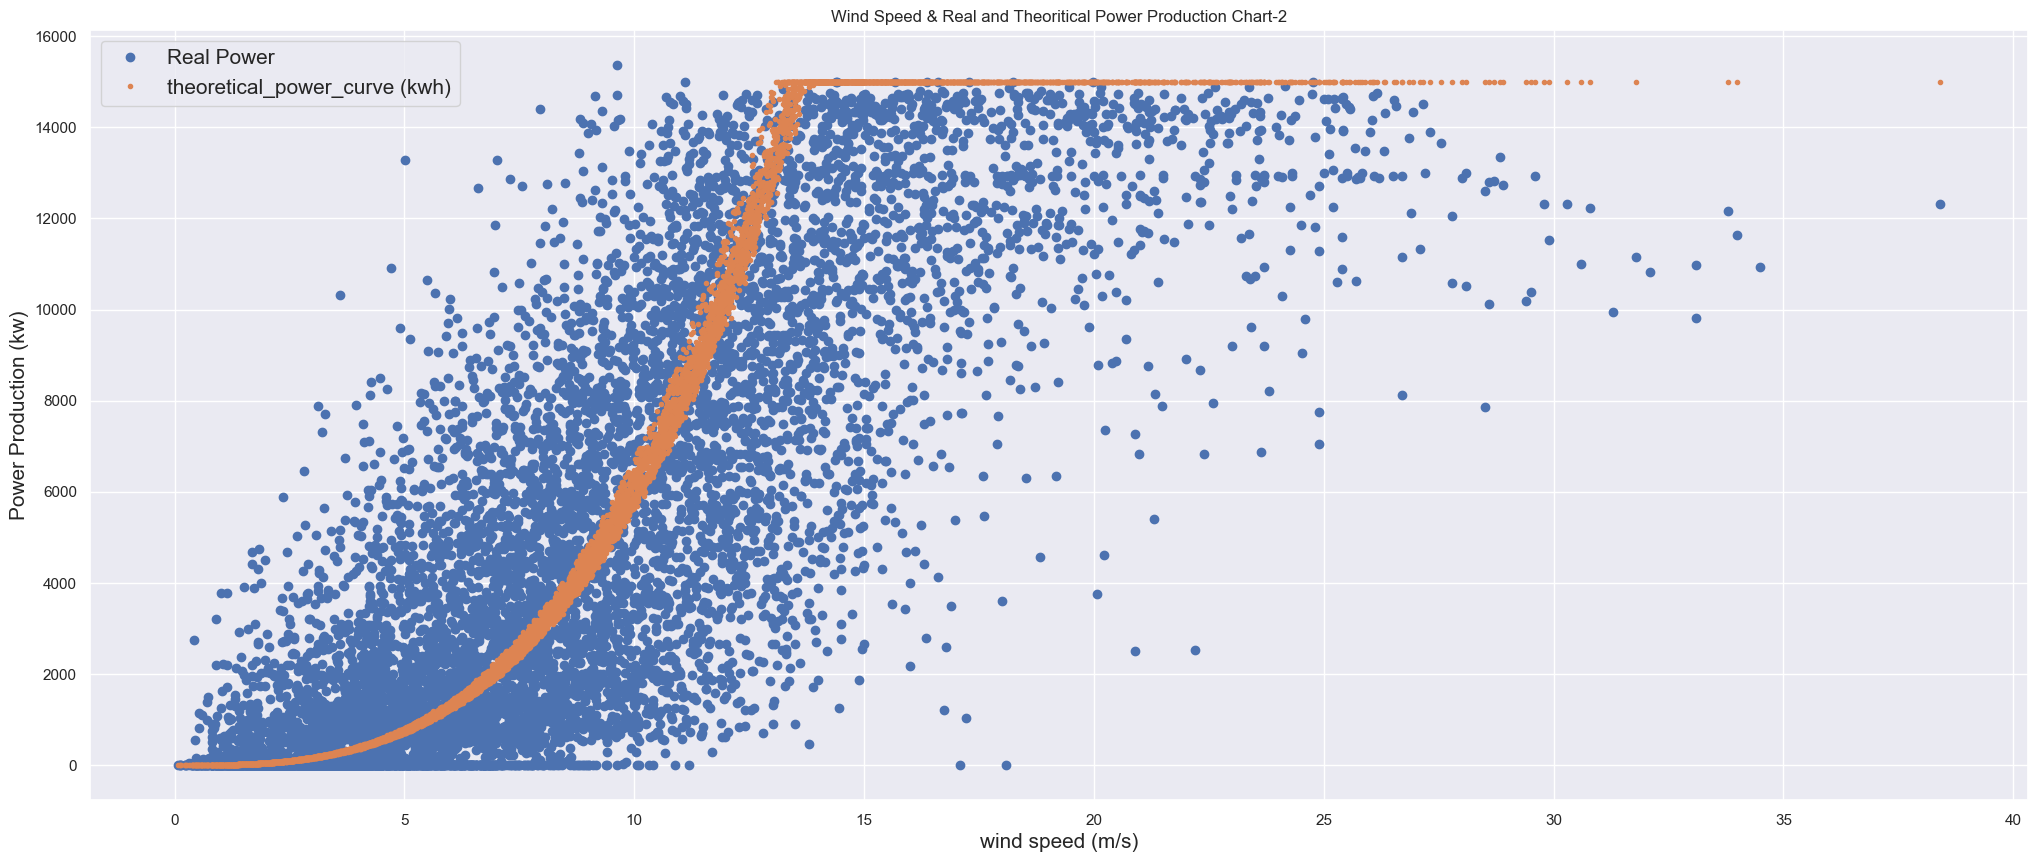

In [49]:
data = df
exp = df['wind_power']
the = df['theoretical_power']
plt.figure(figsize=(25,10)) 
plt.plot(df['wind_speed'], df['wind_power'], 'o', label='Real Power')
plt.plot(df['wind_speed'], df['theoretical_power'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Speed & Real and Theoritical Power Production Chart-2')
plt.legend(fontsize=15)
plt.show()

In order to develop an application that utilizes historical wind speed, wind direction and temperature values, and machine learning algorithms to forecast wind turbine power output. It’s a regression problem. After analysing and understanding the dataset, a model can be built to predict wind turbine power production by using the hourly wind speed, wind direction and temperature. Machine learning algorithms were used such as Regressors Models (KNeighbors Regressor, Decision Tree Regressor, Extra Trees Regressor, Gradient Boosting Regressor and Random Forest Regressor) and Long Short-Term Memory (LSTM).

In order to do this, import the necessary libraries like Sckitlearn, tensorflow library for models, pandas, numpy, seaborn, matplotlib for data and visualization. 

First define X (inputs) variables as hourly wind speed, wind direction and temperature; and y (output) variable as wind power. Then split dataset into train and test datasets. Enter test size as 0,3. Then fit the models and evaluate our models’ success with evaluation metrics such as MSE, RMSE, MAE, R-squred.

In [51]:
# Define the features and dataset and split the data into features (X) and target (y)
ftrain = ['wind_speed', 'wind_direction', 'wind_power', 'temperature']

def Definedata():
    data = df[ftrain]
    X = data.drop(columns=['wind_power']).values
    y = data['wind_power'].values
    return X, y

In [52]:
# Perform various regression models and print the evaluation metrics and plot the Wind Turbine Power Production Prediction
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
  
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared: ', metrics.r2_score(y_test, y_pred))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted,file_name):
    y = y_actual
    y_total = y_predicted
    TP = df['theoretical_power']
    number = len(df['wind_speed'])
    aa=[x for x in df['wind_speed']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='theoretical_power_curve (kwh)')
    
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.savefig(file_name)
    plt.show()

# KNeighborsRegressor Model

		Error Table
Mean Absolute Error      :  1719.6339421613395
Mean Squared  Error      :  5660883.6910197865
Root Mean Squared  Error :  2379.2611649459136
R-squared:  0.7206945085674561
Accuracy on Traing set   :  0.8360702909134915
Accuracy on Testing set  :  0.7206945085674561


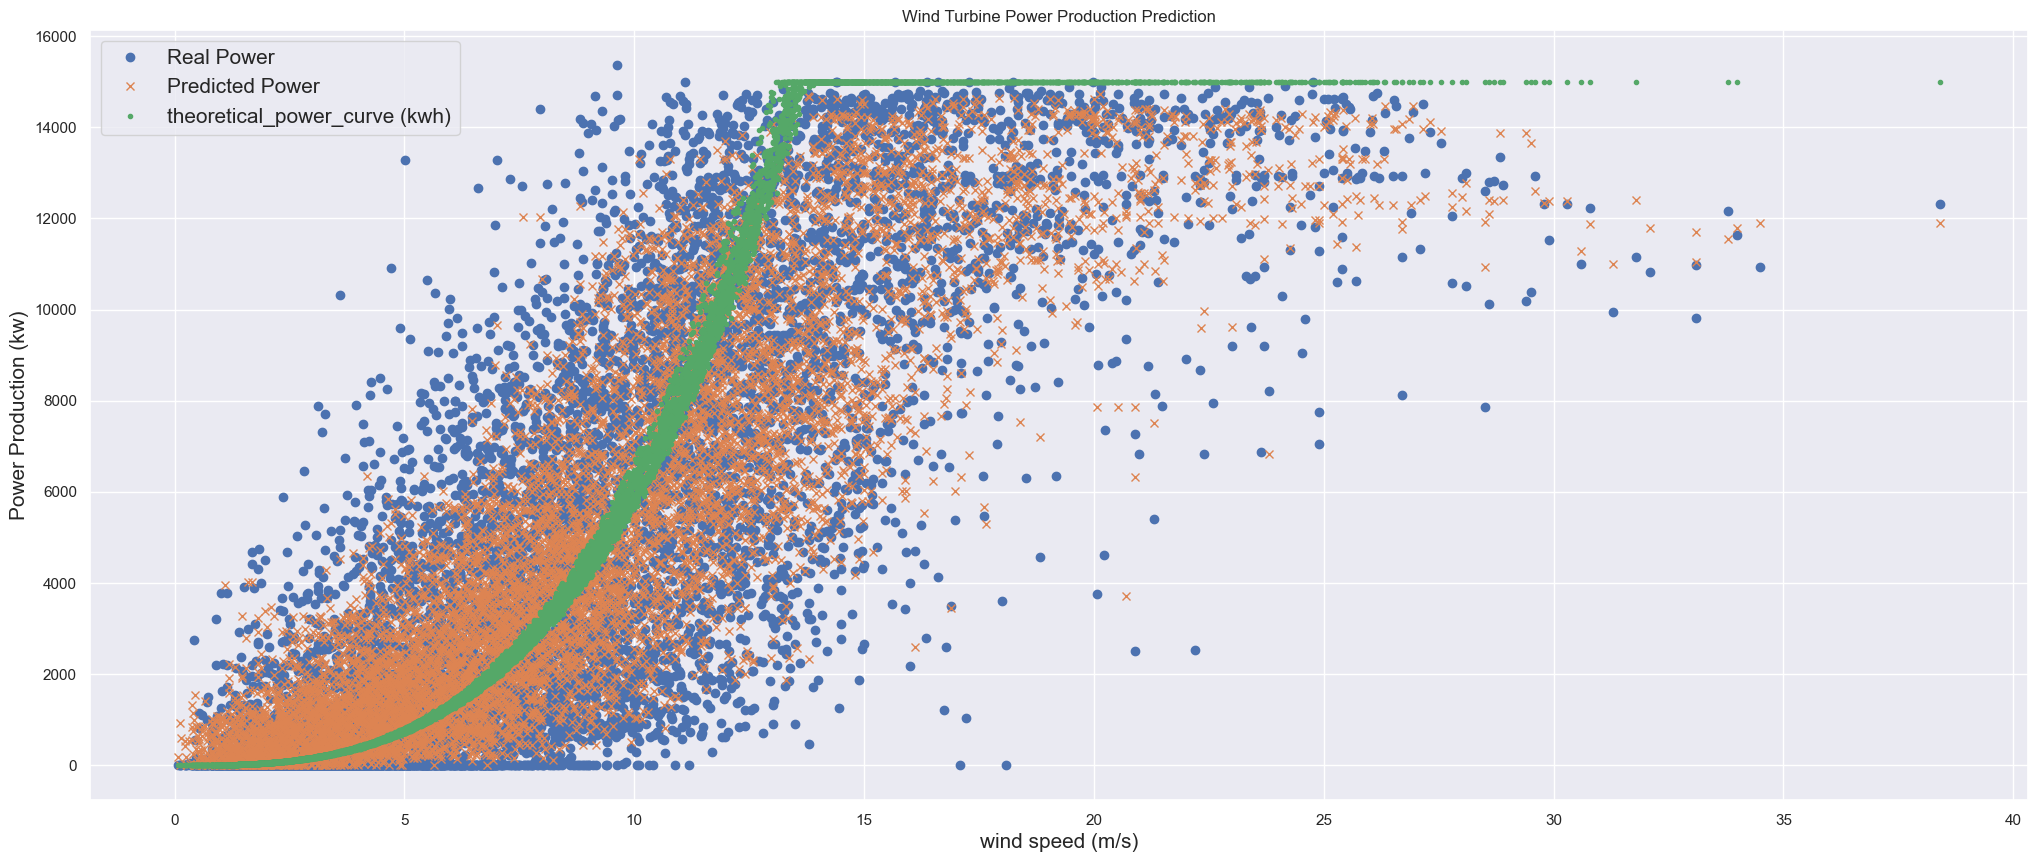

In [54]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted, 'Model_Plots/KNeighbors Regressor Wind Turbine Power Production Prediction.png')

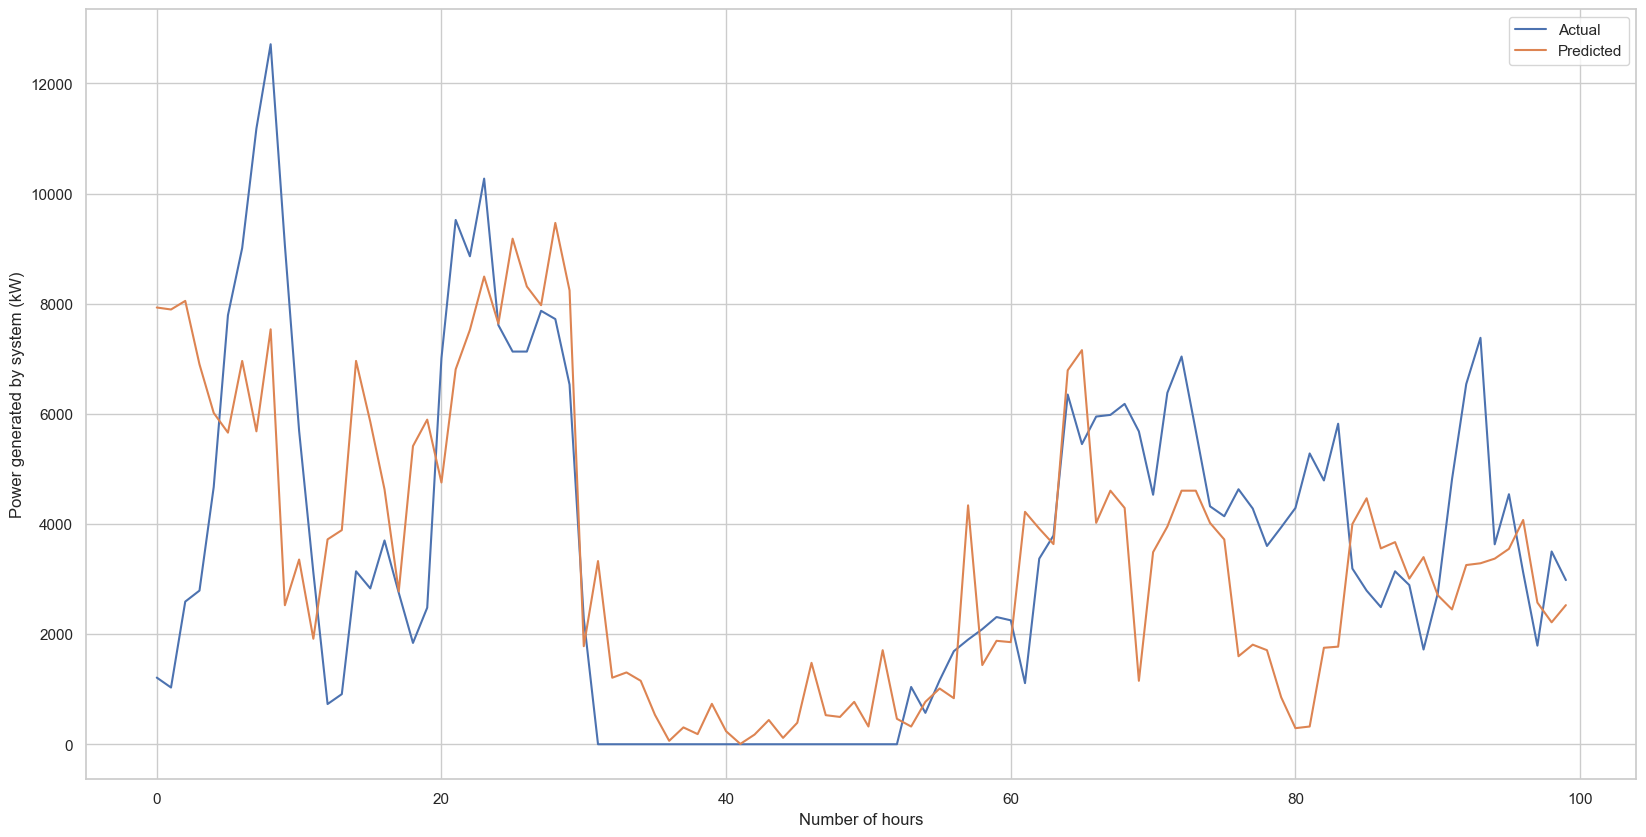

In [55]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="Actual")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.savefig('Model_Plots/Line Plot Of Actual Power And KNeighbors Regressor Predicted Power.png')
plt.show()

# DecisionTreeRegressor Model

		Error Table
Mean Absolute Error      :  2050.8295281582955
Mean Squared  Error      :  8827980.136986302
Root Mean Squared  Error :  2971.1917031700095
R-squared:  0.5644313741281781
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.5644313741281781


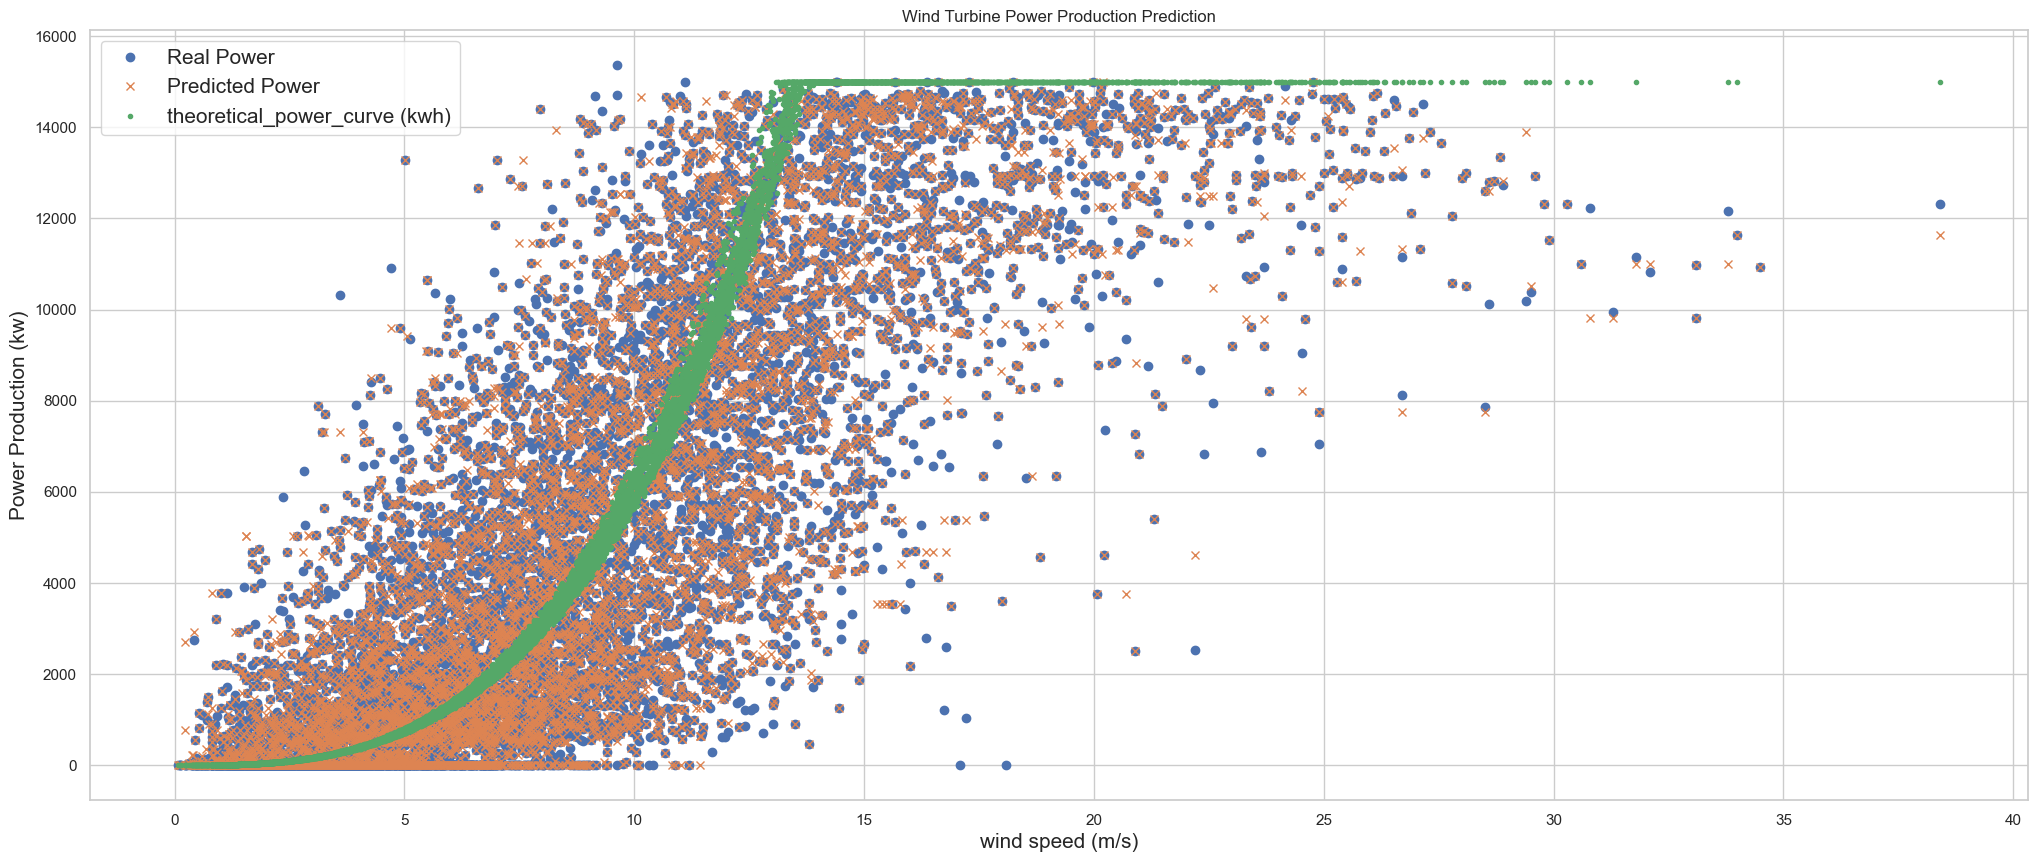

In [57]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted, 'Model_Plots/Decision Tree Regressor Wind Turbine Power Production Prediction.png')

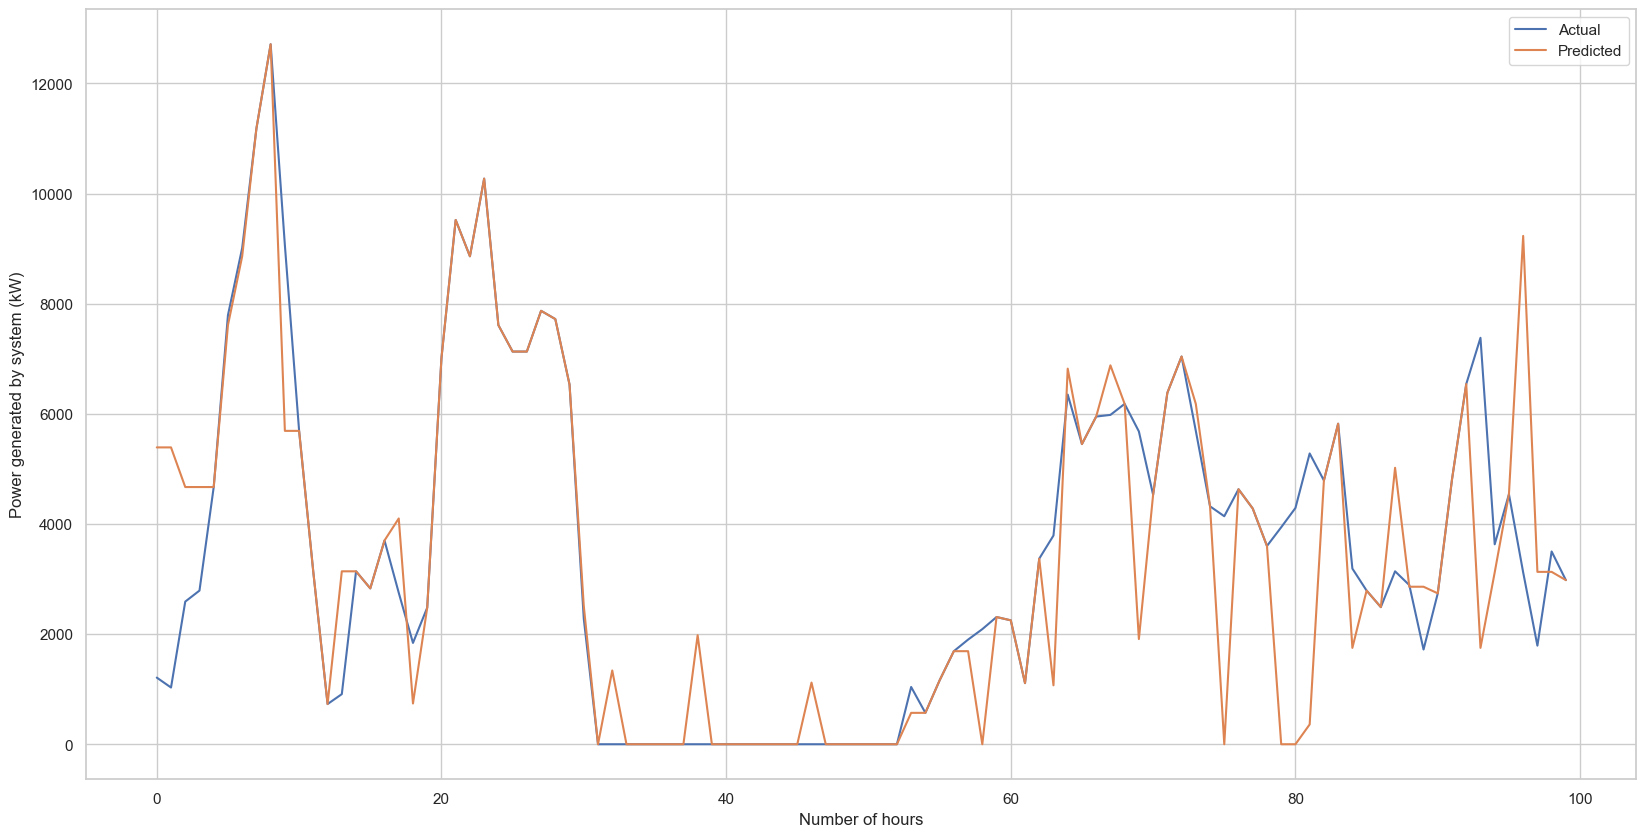

In [58]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="Actual")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.savefig('Model_Plots/Line Plot Of Actual Power And Decision Tree Regressor Predicted Power.png')
plt.show()

# ExtraTreesRegressor Model

		Error Table
Mean Absolute Error      :  1590.8871385083714
Mean Squared  Error      :  4958959.599710806
Root Mean Squared  Error :  2226.8721561218567
R-squared:  0.7553271320185269
Accuracy on Traing set   :  0.9999999903132591
Accuracy on Testing set  :  0.7553271320185269


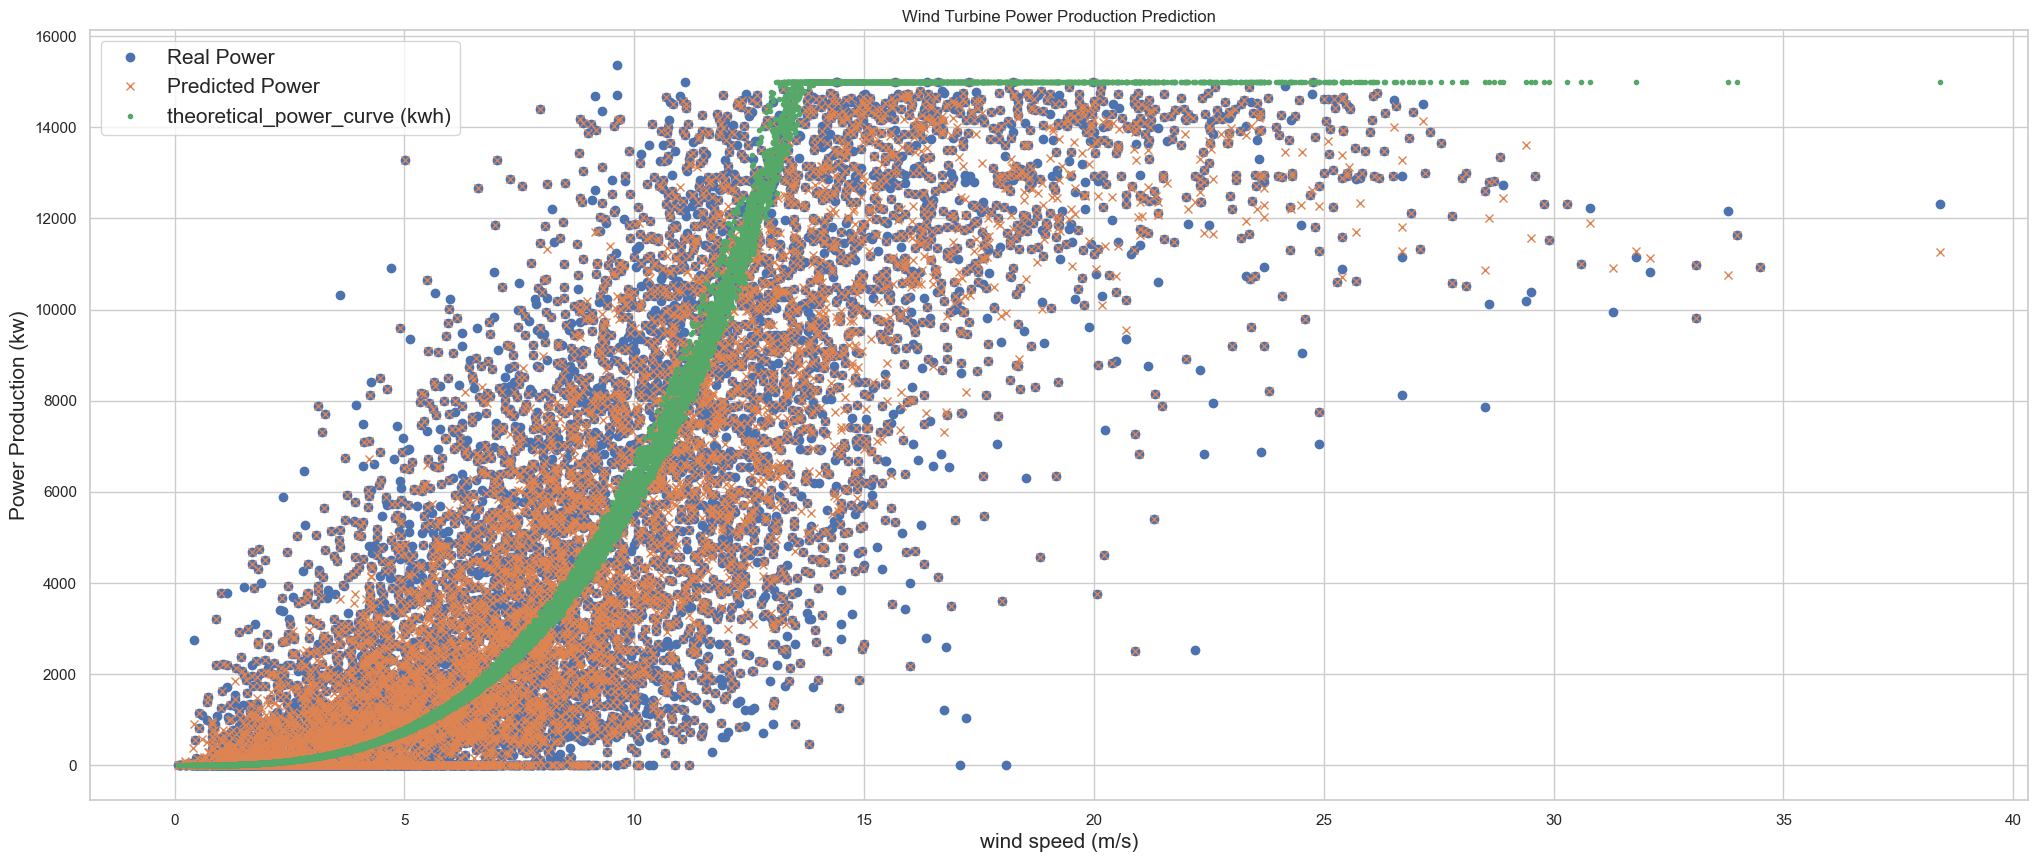

In [60]:
y_predicted, y_actual = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted, 'Model_Plots/Extra Trees Regressor Wind Turbine Power Production Prediction.png')

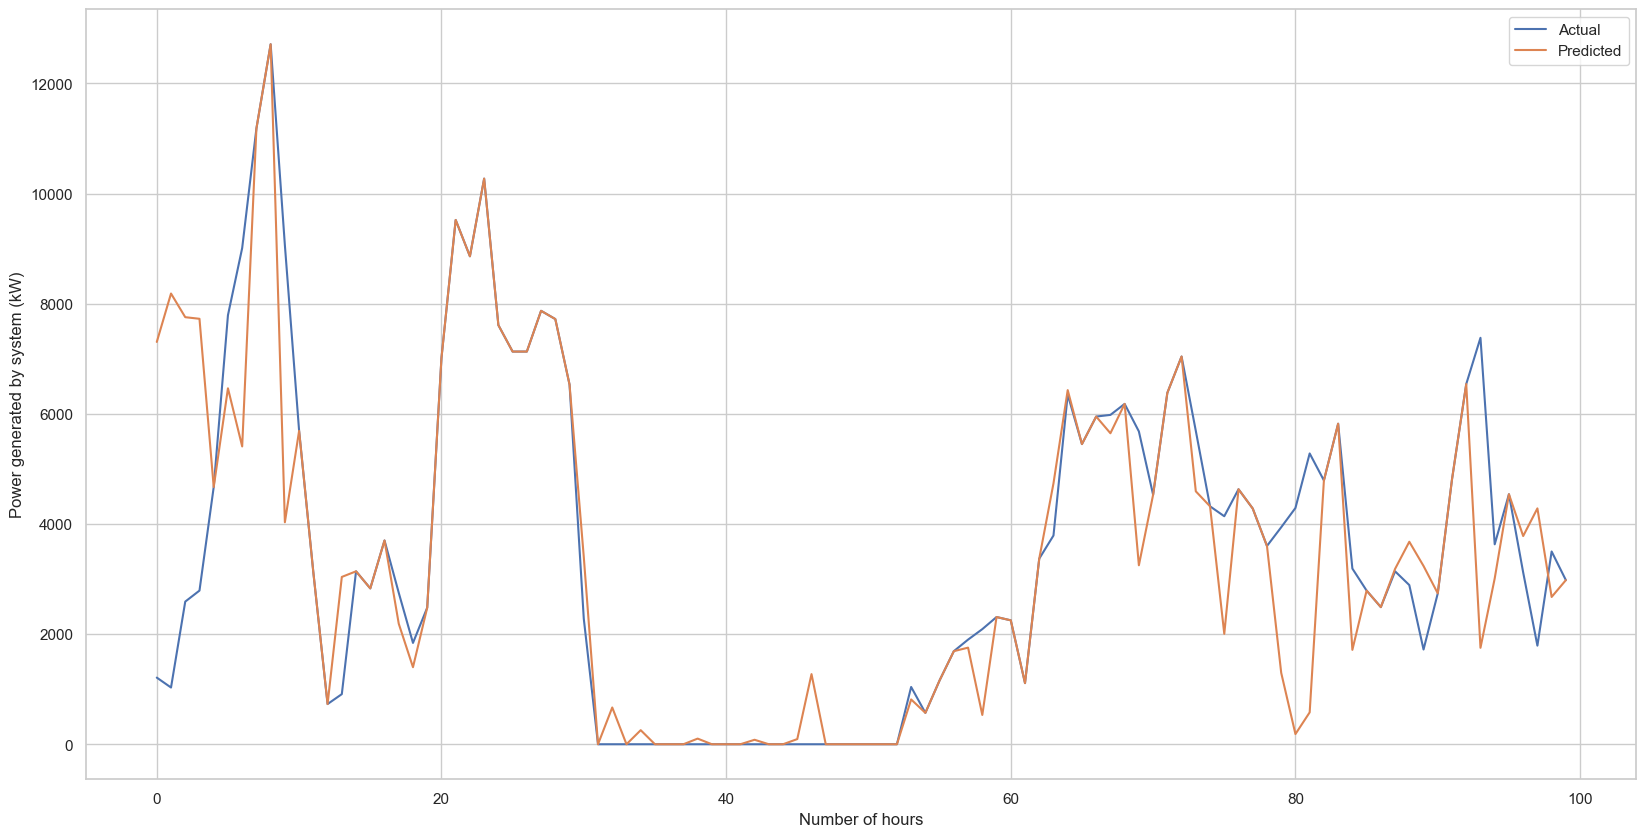

In [61]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="Actual")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.savefig('Model_Plots/Line Plot Of Actual Power And Extra Trees Regressor Predicted Power.png')
plt.show()

# GradientBoostingRegressor Model

		Error Table
Mean Absolute Error      :  1755.3200191608098
Mean Squared  Error      :  5732186.60254827
Root Mean Squared  Error :  2394.198530312027
R-squared:  0.7171764545264188
Accuracy on Traing set   :  0.9226378210362577
Accuracy on Testing set  :  0.7171764545264188


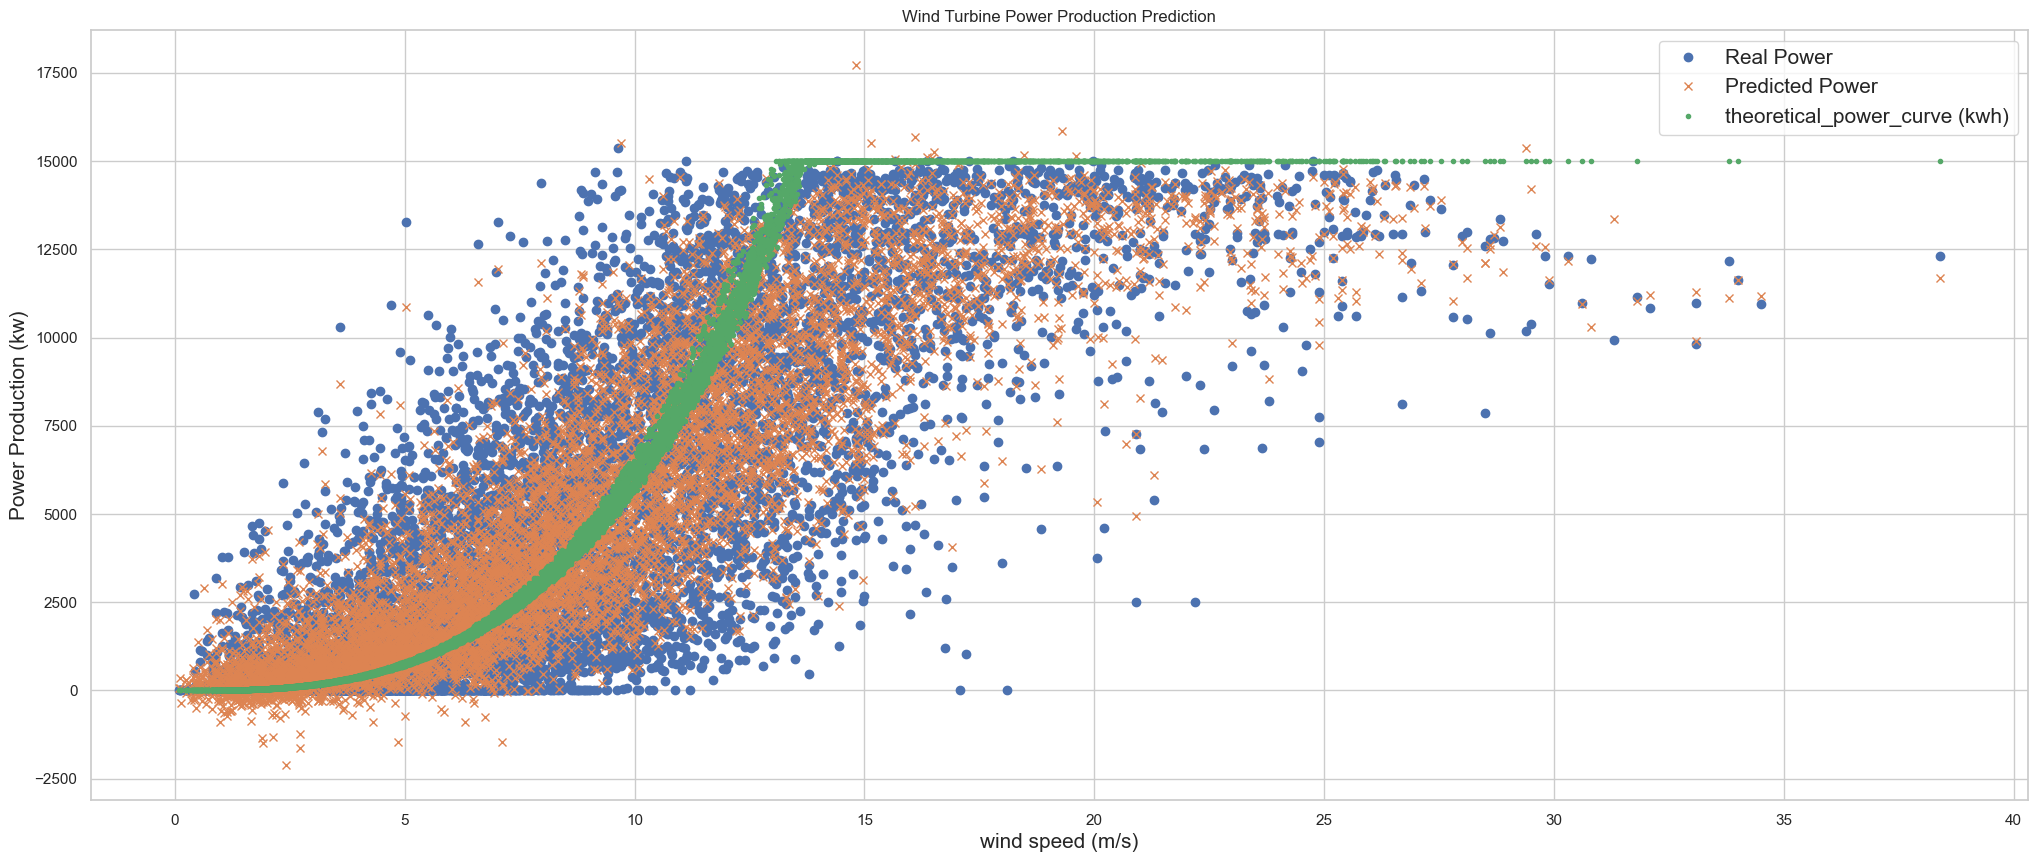

In [63]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted, 'Model_Plots/Gradient Boosting Regressor Wind Turbine Power Production Prediction.png')

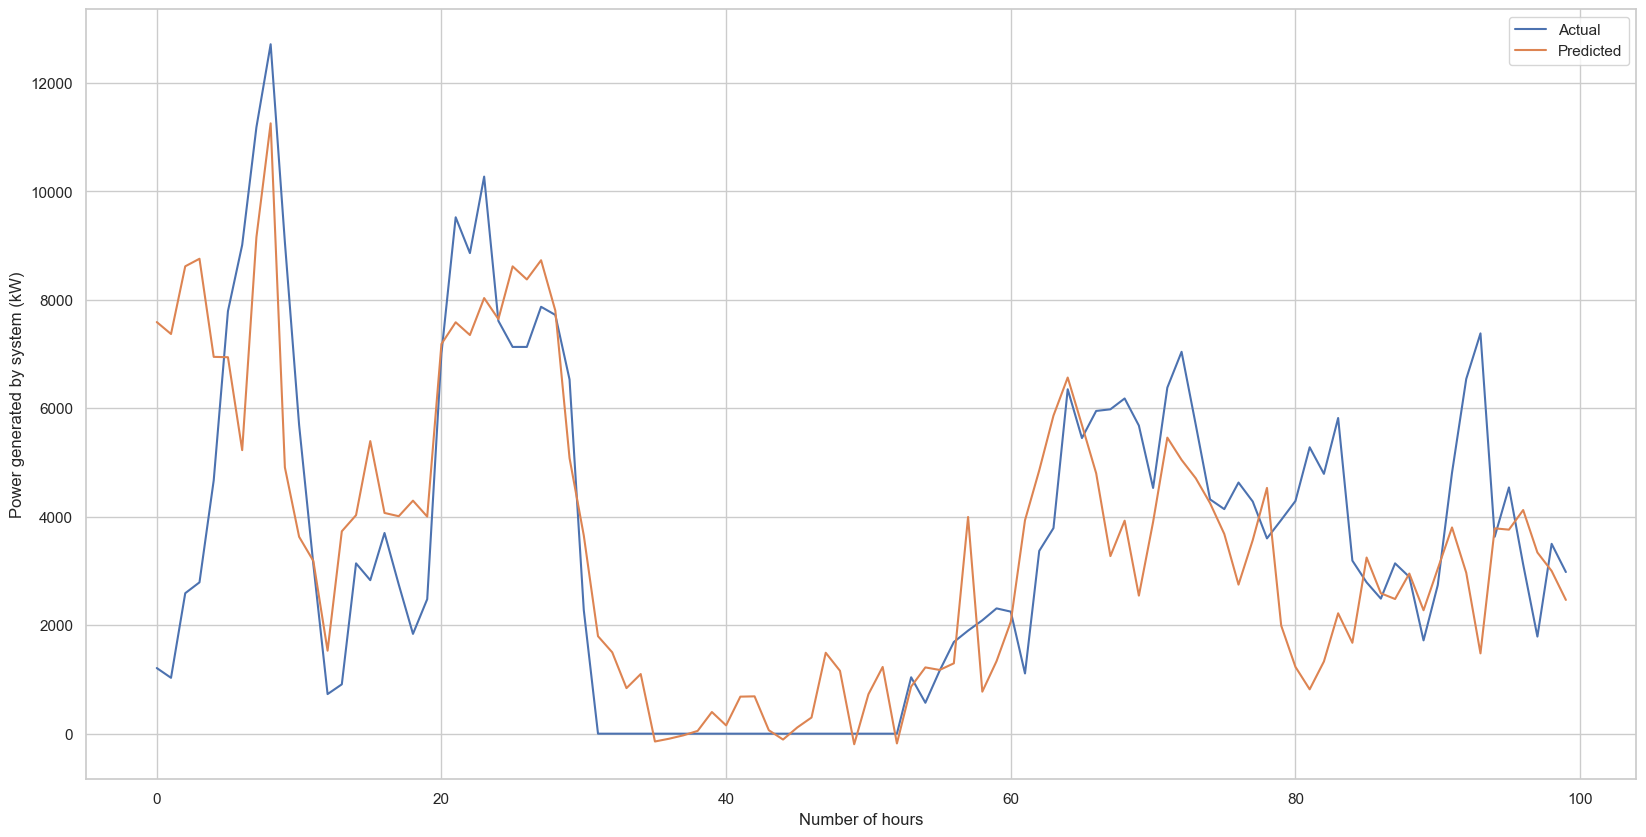

In [64]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="Actual")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.savefig('Model_Plots/Line Plot Of Actual Power And Gradient Boosting Regressor Predicted Power.png')
plt.show()

# RandomForestRegressor Model

		Error Table
Mean Absolute Error      :  1583.6750972498223
Mean Squared  Error      :  4772884.977126909
Root Mean Squared  Error :  2184.693337090336
R-squared:  0.7645079713963728
Accuracy on Traing set   :  0.970965924147587
Accuracy on Testing set  :  0.7645079713963728


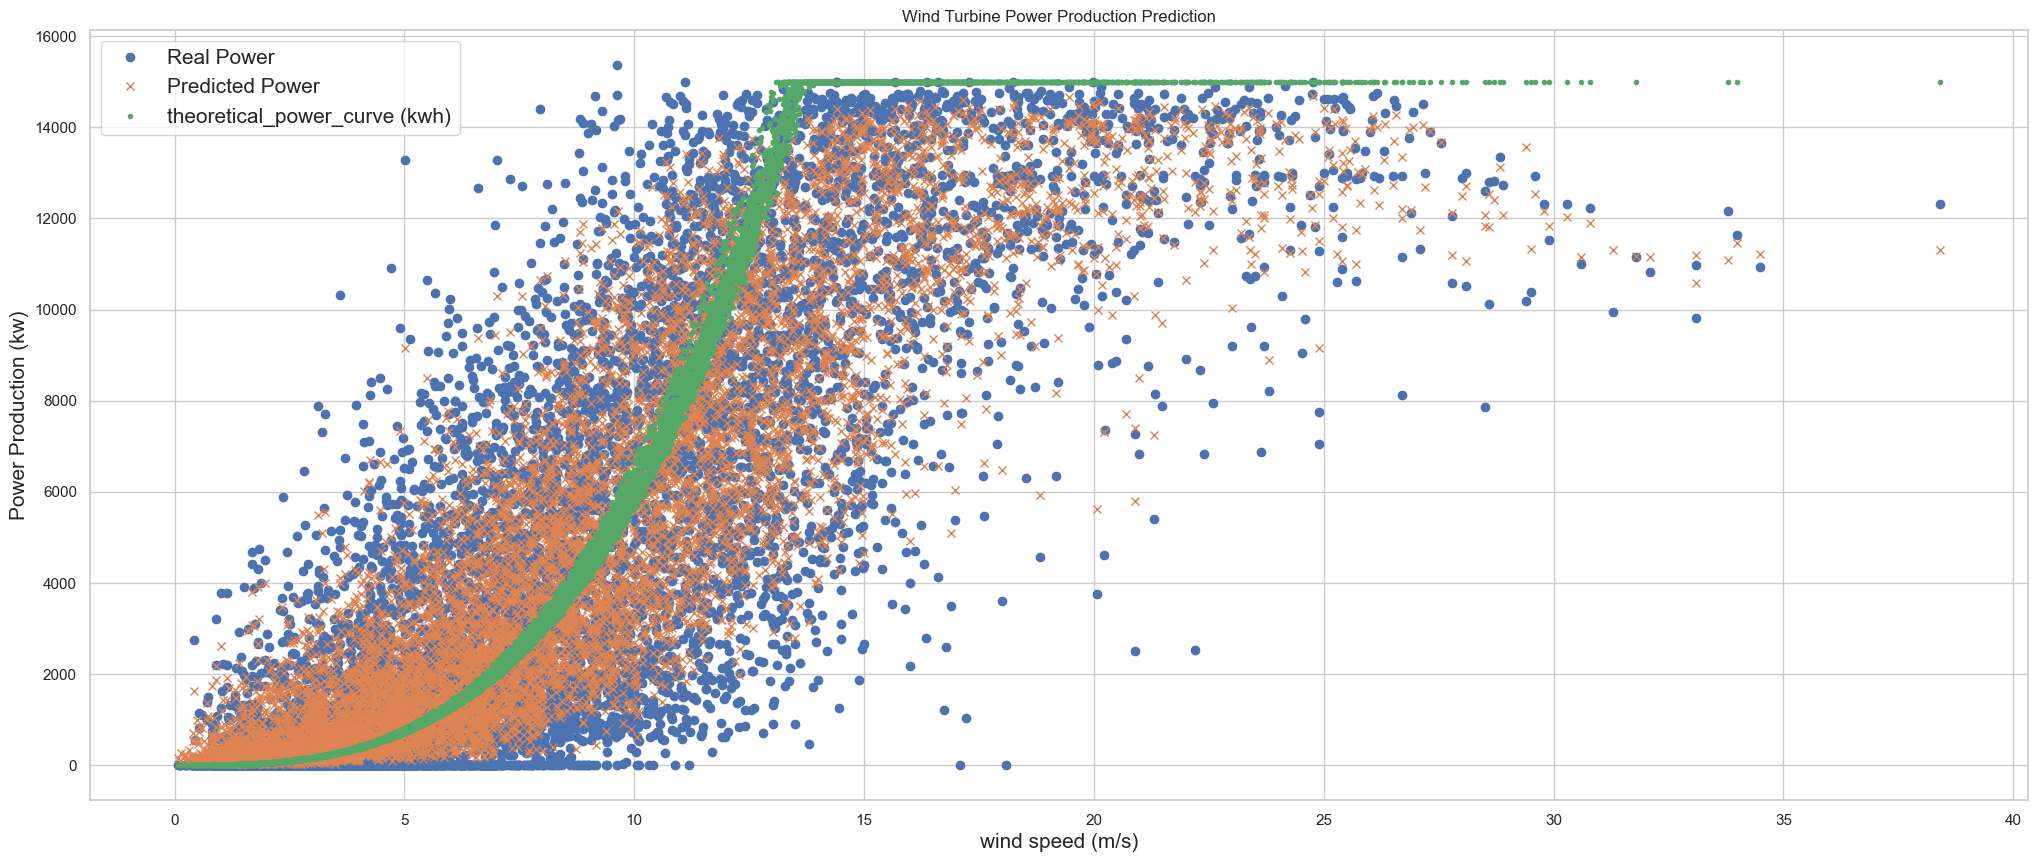

In [66]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted, 'Model_Plots/Random Forest Regressor Wind Turbine Power Production Prediction.png')

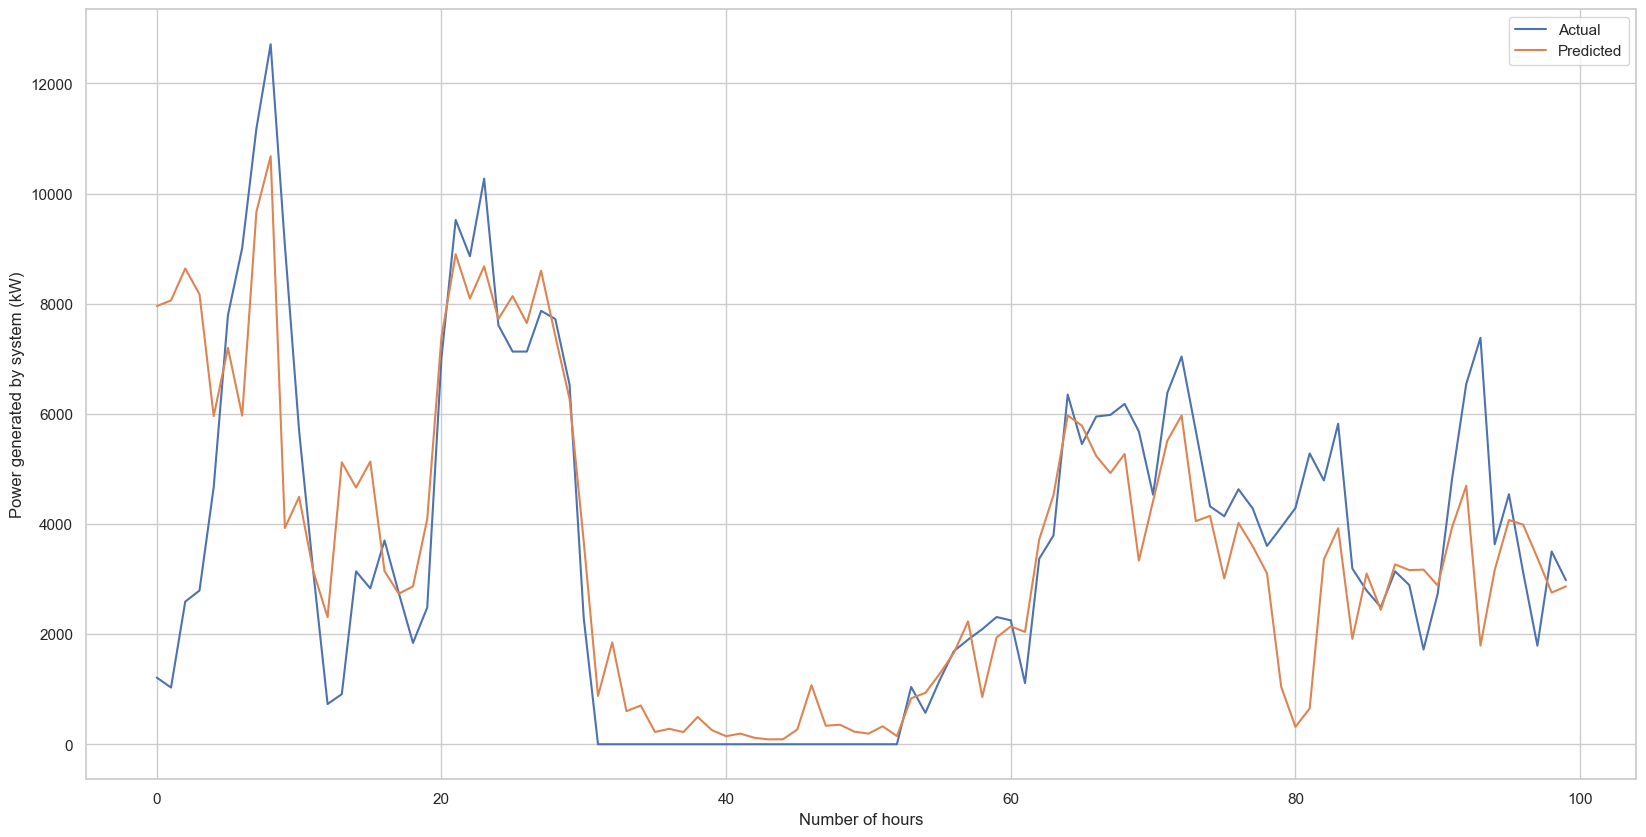

In [67]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="Actual")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.savefig('Model_Plots/Line Plot Of Actual Power And Random Forest Regressor Predicted Power.png')
plt.show()

Plot “Wind Turbine Power Production Predictions” and “Line Plot of Actual Power and Predicted Power” for each model. The blue line shows the actual wind power of wind turbines, the orange one shows the predicted windvpower output from each model used. When the model overfits, it means that it performs well on the training set, but not on the validation (test) set. Accordingly, the model is not able to generalize to unseen data. On the other hand, underfitting means that the model is not able to perform well in either training or validation sets. In fıgure "KNeighbors Regressor Wind Turbine Power Production Prediction" it is seen that the model does not fit exactly, there are too many gaps between the actual wind power and predicted output in different hours. And the Decision Tree model invgraphic. It is an overfitting example, because in some hours the model predicts well, but in some hours there are gaps between the actual wind power of turbines and the predicted output. Random Forest model is better than the others, butvnot enough, it could be enhanced by doing hypermeter optimization.

# LSTM Model

For LSTM model first scale the data by using MinMax scaler. Then define the data as X and y, and split the data as train (0.7) and test (0.3) sets. Reshape the data. Build the LSTM model based on the last observations fort the same period as the lookback. If you want to predict the next 15 days of wind power, you will use the last 15 days of the data. Choose 15 as lookback. And the batch size is 512 which is the number of samples os steps back to us for model. Then fit the model and do inverse transform because of using scaling at the beginning of the model. Because the dataset has to be same shape.

In [71]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
from os import mkdir
# set figure size of graphics
sns.set(rc={'figure.figsize':(6, 4)})

In [72]:
# Create a new directory named "LSTM_Plots"
try:
  mkdir("LSTM_Plots")
except:
  pass

mypaths="LSTM_Plots"

In [96]:
# Load the dataset
df = pd.read_csv("urla_annual.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

time  wind_speed  wind_direction  temperature  wind_power  \
0  2022-12-01 00:00:00   16.748672       303.48303    13.461456      1210.0   
1  2022-12-01 01:00:00   17.214901       302.02982    13.210205      1030.0   
2  2022-12-01 02:00:00   16.783213       296.19452    12.583069      2590.0   
3  2022-12-01 03:00:00   16.343103       294.95004    12.297150      2790.0   
4  2022-12-01 04:00:00   15.911706       292.40262    12.042053      4670.0   

   theoretical_power  
0            15000.0  
1            15000.0  
2            15000.0  
3            15000.0  
4            15000.0

In [98]:
# Convert 'time' column to datetime format
df["time"]= pd.to_datetime(df["time"])

In [100]:
#set the 'time' column as the index of the DataFrame 
df.index= df["time"]

In [102]:
# Define the features and dataset
model_df=df [["wind_speed", "wind_direction", "temperature", "wind_power"]]

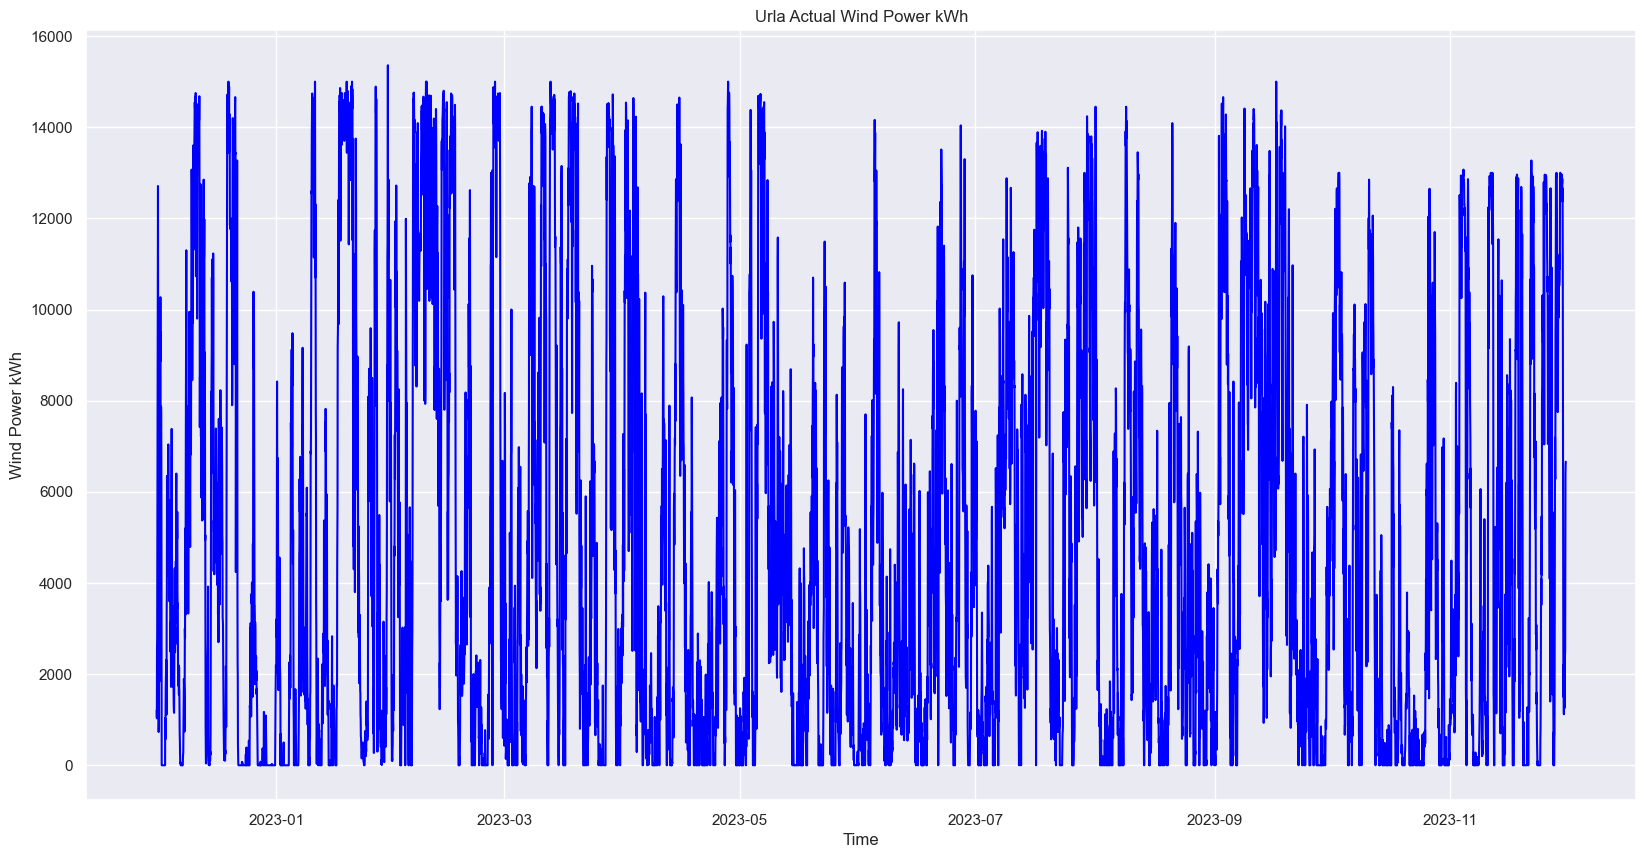

In [104]:
# Plot Urla Actual Wind Power kWh
plt.figure(figsize=(20,10))
plt.plot(model_df["wind_power"], color="blue")
plt.ylabel("Wind Power kWh")
plt.title("Urla Actual Wind Power kWh")
plt.xlabel("Time")
plt.savefig("LSTM_Plots/Urla Actual Wind Power kWh.png")
plt.show()

In [105]:
# Extract independent variables and target variable
X = model_df[['wind_speed', 'wind_direction', 'temperature']].values
y = model_df['wind_power'].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Combine X, time, and y into one array
data_combined = np.concatenate((X_scaled, y_scaled), axis=1)

In [108]:
# Create the lookback dataset
lookback = 360
X_with_lookback = []
y_with_lookback = []
for i in range(lookback, len(data_combined)):
    X_with_lookback.append(data_combined[i - lookback : i, :-1])
    y_with_lookback.append(data_combined[i, -1])
X_with_lookback = np.array(X_with_lookback)
y_with_lookback = np.array(y_with_lookback)
# Split the data into training and testing sets
train_size = int(0.7 * len(X_with_lookback))
X_train, X_test = X_with_lookback[:train_size], X_with_lookback[train_size:]
y_train, y_test = y_with_lookback[:train_size], y_with_lookback[train_size:]

In [110]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

# Set up model checkpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [112]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/50
82/82 [==============================] - ETA: 0s - loss: 0.0595
Epoch 1: val_loss improved from inf to 0.03841, saving model to best_model.h5
82/82 [==============================] - 47s 501ms/step - loss: 0.0595 - val_loss: 0.0384
Epoch 2/50
82/82 [==============================] - ETA: 0s - loss: 0.0288
Epoch 2: val_loss improved from 0.03841 to 0.03470, saving model to best_model.h5
82/82 [==============================] - 50s 608ms/step - loss: 0.0288 - val_loss: 0.0347
Epoch 3/50
82/82 [==============================] - ETA: 0s - loss: 0.0262
Epoch 3: val_loss improved from 0.03470 to 0.03402, saving model to best_model.h5
82/82 [==============================] - 64s 785ms/step - loss: 0.0262 - val_loss: 0.0340
Epoch 4/50
82/82 [==============================] - ETA: 0s - loss: 0.0256
Epoch 4: val_loss did not improve from 0.03402
82/82 [==============================] - 70s 863ms/step - loss: 0.0256 - val_loss: 0.0342
Epoch 5/50
82/82 [==============================] -

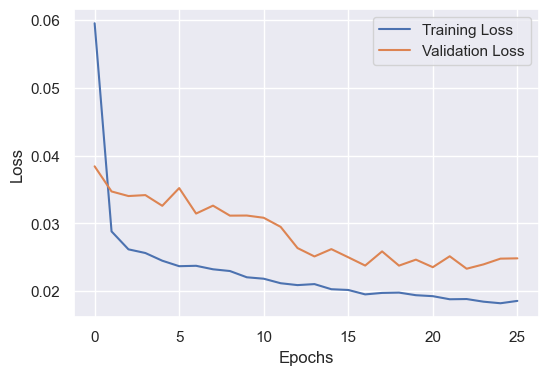

In [115]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("LSTM_Plots/Epochs VS Training And Validation Loss.png")
plt.show()

The training loss first decreases fastly and then it continues to decrease. On the other hand validation loss first goes down then up, it is changing up and down. And they have gaps during the epoches.

In [117]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, batch_size=72, verbose=0)
test_loss = model.evaluate(X_test, y_test, batch_size=72, verbose=0)
print('\nTrain loss: %.1f%%' %(100.0*train_loss))
print('\nTest loss: %.1f%%' %(100.0*test_loss))


Train loss: 1.7%

Test loss: 2.5%


In [118]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

79/79 [==============================] - 9s 110ms/step


In [119]:
y_train_pred

array([[0.4924752 ],
       [0.49850905],
       [0.50765187],
       ...,
       [0.07354793],
       [0.07862242],
       [0.06518424]], dtype=float32)

In [120]:
# Inverse transform the predictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [121]:
y_train_pred_inv

array([[7564.4194],
       [7657.099 ],
       [7797.5327],
       ...,
       [1129.6962],
       [1207.6404],
       [1001.23  ]], dtype=float32)

In [122]:
# Calculate MSE,RMSE, MAE R-squared
train_mse = mean_squared_error(y_train_inv, y_train_pred_inv)
test_mse = mean_squared_error(y_test_inv, y_test_pred_inv)
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
train_r2 = r2_score(y_train_inv, y_train_pred_inv)
test_r2 = r2_score(y_test_inv, y_test_pred_inv)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train R-squared:', train_r2)
print('Test R-squared:', test_r2)

Train MSE: 4113776.233955652
Test MSE: 5859120.369349129
Train RMSE: 2028.244618865203
Test RMSE: 2420.561994527124
Train MAE: 1502.9869242713564
Test MAE: 1758.5517200712175
Train R-squared: 0.8113510827345791
Test R-squared: 0.6986128272450706


In [123]:
# Plot predictions and actual values
time_train = np.arange(lookback, lookback + len(y_train_inv))
time_test = np.arange(lookback + len(y_train_inv), lookback + len(y_train_inv) + len(y_test_inv))

In [124]:
# Convert time_train and time_test to datetime objects
time_train = pd.to_datetime(model_df.index[:train_size])
time_test = pd.to_datetime(model_df.index[train_size:])

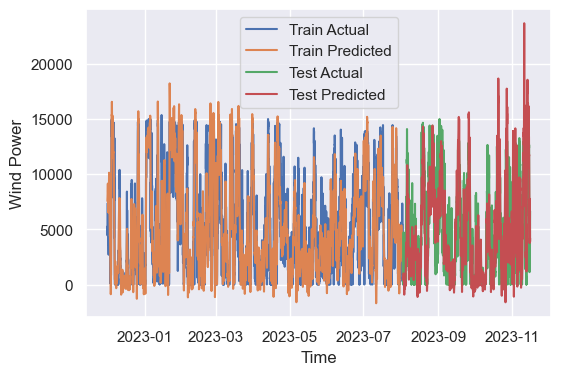

In [125]:
# Plot Urla Actual  And Predicted Wind Power kWh
plt.plot(time_train, y_train_inv, label='Train Actual')
plt.plot(time_train[:len(y_train_pred_inv)], y_train_pred_inv, label='Train Predicted')
plt.plot(time_test[:len(y_test_inv)], y_test_inv, label='Test Actual')
plt.plot(time_test[:len(y_test_pred_inv)], y_test_pred_inv, label='Test Predicted')
plt.xlabel('Time')
plt.ylabel('Wind Power')
plt.legend()
plt.savefig("LSTM_Plots/Urla Actual  And Predicted Wind Power kWh.png")
plt.show()

In [126]:
train_prediction_df = pd.DataFrame()
train_prediction_df["Actual"] = y_train_inv.flatten()
train_prediction_df["Predicted"] = y_train_pred_inv.flatten()
train_prediction_df.head()

Actual    Predicted
0  5250.0  7564.419434
1  5000.0  7657.099121
2  4450.0  7797.532715
3  4550.0  7955.863281
4  5700.0  8170.261230

In [127]:
test_prediction_df = pd.DataFrame()
test_prediction_df["Actual"] = y_test_inv.flatten()
test_prediction_df["Predicted"] = y_test_pred_inv.flatten()
test_prediction_df.head()

Actual   Predicted
0   540.0  686.245850
1     0.0  404.171570
2     0.0  443.728058
3  1260.0  744.422119
4  2670.0  947.001099

# RandomForestRegressor Model For Application

In [145]:
# Load the dataset
df = pd.read_csv('urla_annual.csv')
ftrain = ['wind_speed', 'wind_direction', 'wind_power', 'temperature']

def Definedata():
    # define dataset
    data = df[ftrain]
    X = data.drop(columns=['wind_power']).values
    y = data['wind_power'].values
    return X, y

In [147]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)
random_forest_model = RandomForestRegressor(n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25)
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=350)

In [148]:
inputs = {0:'wind_speed', 1:'wind_direction', 2:'temperature'}

In [151]:
# Taking user input
a = []
for i in range(len(inputs)):
    print(inputs[i])
    a.append(input())

wind_speed


 10


wind_direction


 120


temperature


 15


In [153]:
# Preprocesing the input
a = np.array(a)
a=pd.DataFrame(a).T

In [155]:
# prediction of result
result = random_forest_model.predict(a)
print('LV ActivePower',result)

LV ActivePower [3865.91428571]


## Save the file as pkl file

In [157]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [159]:
import joblib
from joblib import dump

In [161]:
joblib.dump(random_forest_model, "random_forest_model.pkl")

['random_forest_model.pkl']